# Cardiovascular Disease Prediction Project

## Name: <span style="color:blue"> *Kento Hopkins* </span>

## Introduction

Cardiovascular disease is one of the most significant health issues we face in modern society. According to the CDC (https://www.cdc.gov/heart-disease/data-research/facts-stats/index.html), heart disease is the leading cause of death across various groups of people, regardless of gender, race, or ethnicity. The same source states that one person dies from cardiovascular disease every 33 seconds. Although we face many health challenges, the high cost of healthcare and insurance makes access unaffordable for many people. This prediction project aims to analyze the health factors contributing to cardiovascular disease and provide suggestions for improvements to address health disparities caused by financial status.

As suggested by the study published in Circulation (https://www.ahajournals.org/doi/10.1161/CIRCULATIONAHA.124.070265), predicting cardiovascular disease is challenging, even though we have various health measures, some of which have been proven to impact the risk of heart-related diseases, and we have observed correlations. Additionally, according to Harvard Health (https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk), heart disease prediction has never been an exact science. The same source mentions that, even with factors like smoking status, diabetes, and cholesterol levels, predicting heart disease remains difficult. Even though new approaches, such as the coronary artery calcium scan, have developped, many people cannot afford cutting-edge healthcare due to its high cost.

In this project, I used two main approaches, logistic regression and neural networks. Logistic regression returns a probability value between 0 and 1 based on the input of independent variables. This is beneficial for our prediction task, as we are trying to classify whether a person is diagnosed with cardiovascular disease which is a binary outcome. My choice to use a neural network was driven by both my curiosity to gain hands-on experience and its ability to capture more complex data correlations. Given the complexity of predicting cardiovascular disease which is a major challenge even in the healthcare industry, I believe neural networks offer a powerful solution for this type of problem.

## Utils

In [7]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace
import math
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse
from sklearn.datasets import make_regression

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

## Data

### Introducing Dataset

For this project, I was looking for a dataset with more than 10,000 samples. I found this dataset on Kaggle, and the following is its MLA citation. \
 Cardiovascular Disease Dataset. 20 Jan. 2019, www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset.

This cardiovascular disease dataset contains 70,000 data samples with 12 different features. These include: age (in days), height (in centimeters), weight (in kilograms), gender (1 indicates female, 2 indicates male), systolic blood pressure (ap_hi), diastolic blood pressure (ap_lo), cholesterol level, glucose level, smoking status, alcohol intake status, physical activity status, and the presence or absence of cardiovascular disease. According to the CDC (Heart Disease Risk Factors), key risk factors for heart disease include high blood pressure, high cholesterol, and smoking. Therefore, this dataset contains more than enough relevant features to explore correlations with the diagnosis outcome. To further explain some of the features: systolic blood pressure represents the pressure in your blood vessels when your heart beats and pumps blood, while diastolic blood pressure represents the pressure in your arteries when your heart is at rest between beats. Overall, this dataset provides a large number of samples and a wide variety of features, making it great for experimenting with different combinations of variables to enhance prediction performance.

Later in the project, I wanted to compare results from the primary dataset with another dataset that includes symptoms of heart disease as features. I found a secondary dataset from the following source: Cardiovascular\_Disease\_Dataset (2023, December 9). https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset.

 It includes features such as Age, Gender, Resting Blood Pressure, Serum Cholesterol, and Fasting Blood Sugar which are similar to the primary dataset, but also contains unique features like Chest Pain Type, Resting Electrocardiogram Results, Maximum Heart Rate Achieved, Exercise-Induced Angina, Oldpeak, Slope of the Peak Exercise ST Segment, Number of Major Vessels, and a target classification. This dataset focuses on a different set of attributes for predicting cardiovascular disease, which may lead to different prediction results compared to the primary dataset.

In [12]:
cardiovascular_disease_df = pd.read_csv("Cardiovascular_Disease_Dataset.csv", delimiter=';')

For this dataset, you need to set the delimiter to ‘;’. If you don’t specify a delimiter, the data will appear like this:
id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio.

In [14]:
cardiovascular_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [15]:
cardiovascular_disease_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


As we can see, age is recorded in days, so let’s convert it to age in years.

In [17]:
cardiovascular_disease_df = pd.read_csv("Cardiovascular_Disease_Dataset.csv", delimiter=';') #call this in case of you call this iteratively
cardiovascular_disease_df['age'] = (cardiovascular_disease_df['age']) / 365
cardiovascular_disease_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Checking Data

Next, I would like to ensure that there are no data samples containing one or more null values.

In [20]:
def check_null(
    X: np.ndarray, 
    col_index : int
    ):
    amount_null = 0;
    for i in range(len(X)):
        if (X[i][col_index] == None):
            amount_null = amount_null + 1
    if(amount_null != 0):
        return True
        
    return False

In [21]:
check_arr = cardiovascular_disease_df.to_numpy()
clean_data = True
n_samples, n_features = check_arr.shape
for i in range(n_features):
    null_check = check_null(check_arr, i)
    if(null_check):
        clean_data = False

if(clean_data):
    print("No Null in the dataset.")
else:
    print("Required to clean the dataset.")

No Null in the dataset.


Since there are no null elements in the dataset, we can use it without dropping any data samples.

### Adding Feature
Since we see both hight and weight I would like to add new feature BMI.

In [24]:
bmi = []
arr = cardiovascular_disease_df.to_numpy()
n_samples, n_features = arr.shape

for i in range(n_samples):
    val = (arr[i][4]) / ((arr[i][3] / 100) ** 2)
    bmi.append(val)
    
cardiovascular_disease_df['BMI'] = bmi

cardiovascular_disease_df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


### Visualization

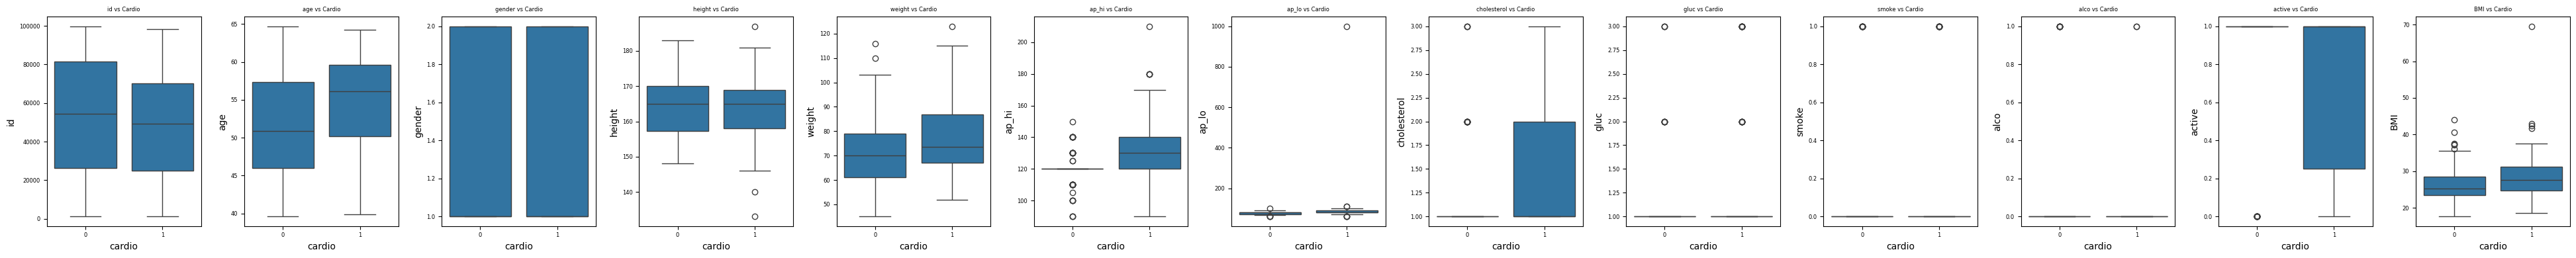

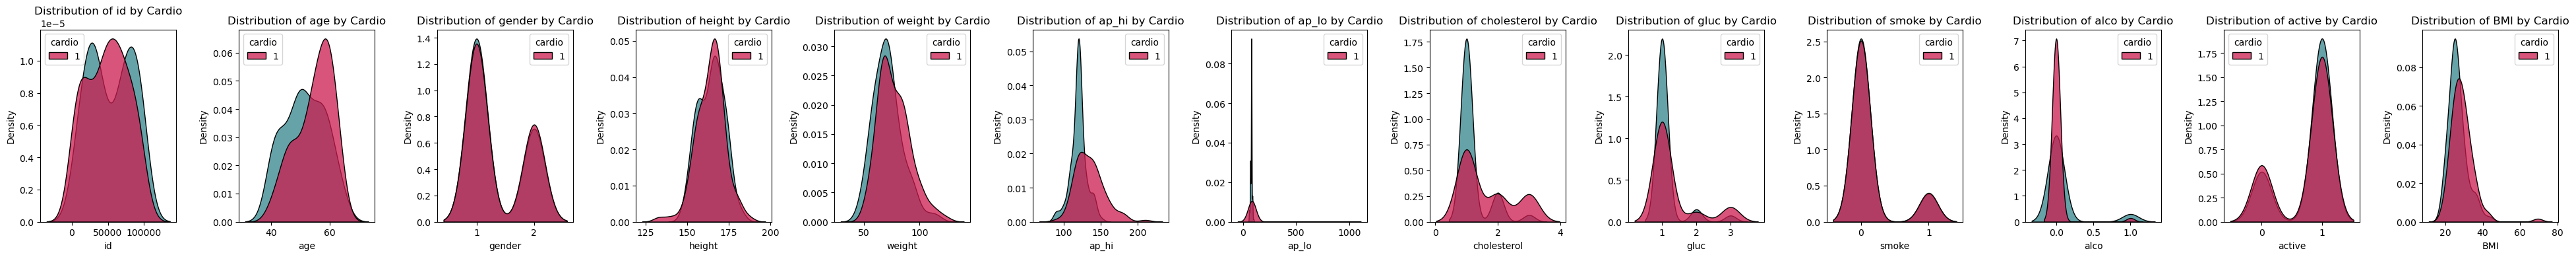

In [26]:
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(cardiovascular_disease_df)), size=200, replace=False)
cardiovascular_disease_df_cp = cardiovascular_disease_df.iloc[indices].copy()
arr = cardiovascular_disease_df_cp.to_numpy()
n_samples, n_features = arr.shape
features = cardiovascular_disease_df_cp.columns.tolist()
features.remove('cardio')

plt.figure(figsize=(3 * n_features, 4))
for i in range(n_features - 1):
    plt.subplot(1, 14, i + 1)
    sns.boxplot(data=cardiovascular_disease_df_cp, x='cardio', y=features[i])
    plt.title(f'{features[i]} vs Cardio', fontsize=6)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

plt.tight_layout()
plt.show()

plt.figure(figsize=(3 * n_features, 4))
for i in range(n_features - 1):
    plt.subplot(1, 14, i + 1)
    sns.kdeplot(data=cardiovascular_disease_df_cp[cardiovascular_disease_df_cp['cardio'] == 0], x=features[i], hue='cardio', multiple="stack", palette="crest", label='Cardio=Not Diagnosed', fill=True)
    sns.kdeplot(data=cardiovascular_disease_df_cp[cardiovascular_disease_df_cp['cardio'] == 1], x=features[i], hue='cardio', multiple="stack", palette="rocket", label='Cardio=Diagnosed', fill=True)
    plt.title(f'Distribution of {features[i]} by Cardio')

plt.tight_layout()
plt.show()

In these two types of visualizations, I wanted to see whether there are differences in the distribution of each feature between people diagnosed with cardiovascular disease and those who are not.

The first set of visualizations, which are boxplots, show clear differences in features such as age, weight, ap_hi (systolic blood pressure), cholesterol, active status, and BMI. Except for the “active” feature, individuals diagnosed with cardiovascular disease tend to have higher values in these features.

The second set of visualizations is used to observe distribution differences in continuous, numarical features such as age, weight, and blood pressure. In these plots, some features like gender, height, smoking status, and active status appear to have similar shapes and overlap significantly between the two groups. However, noticeable differences can still be seen in age, weight, blood pressure, cholesterol, and glucose levels.

The glucose feature did not show a significant difference in the boxplot but does show some noticeable separation in the second visualization. Also, in the second set of visualizations, the “active” feature does not show a significant difference between those diagnosed with cardiovascular disease and those who are not, as was observed in the boxplot. This may be due to the y-axis scale in the boxplot being too precise for this feature.

From these two visualizations, we can conclude that features like ‘id’, ‘gender’, ‘height’, ‘smoke’, and ‘active’ may not contribute significantly to the risk of cardiovascular disease.

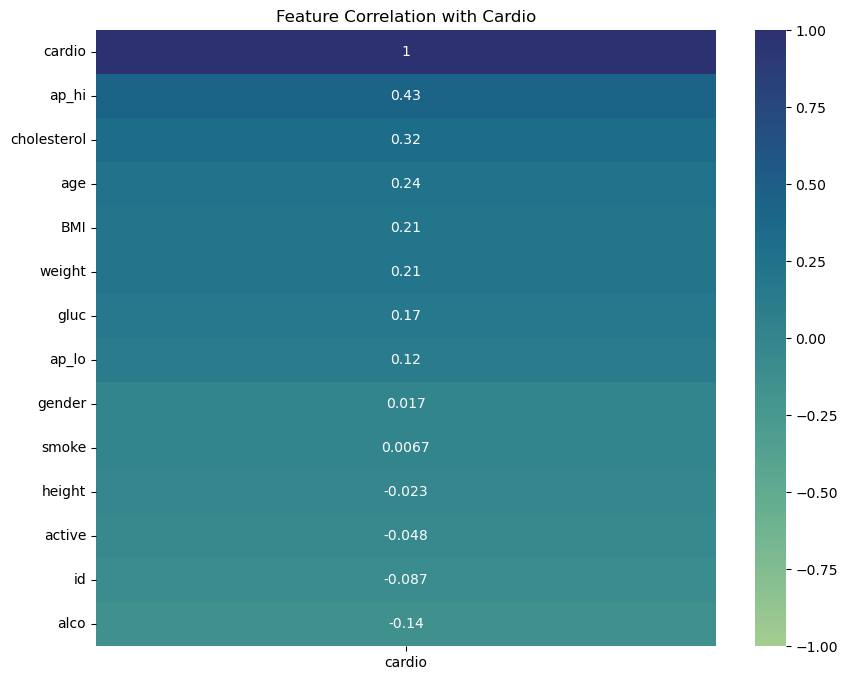

In [28]:
corr = cardiovascular_disease_df_cp.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cardiovascular_disease_df_cp.corr()[['cardio']].sort_values(by='cardio', ascending=False), vmin=-1, vmax=1, annot=True, cmap="crest")
heatmap.set_title("Feature Correlation with Cardio")
plt.show()

This visualization indicates the correlation between cardiovascular disease and each feature. From this, we can observe significant differences in correlation between the top eight features and the rest, such as gender, smoking, height, activity, and ID.

One interesting point I noticed is that although BMI is calculated using height which by itself does not have a strong correlation with cardiovascular disease, BMI shows a stronger correlation than weight alone. This suggests that creating new features based on existing ones can result in stronger correlations and may improve predictive performance, even if the original features used in the calculation do not individually have high correlation with the target variable.

Now, let’s take a closer look at the distribution of the top eight features.

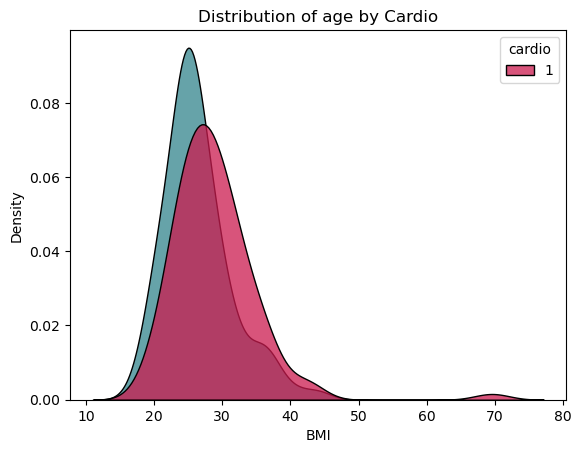

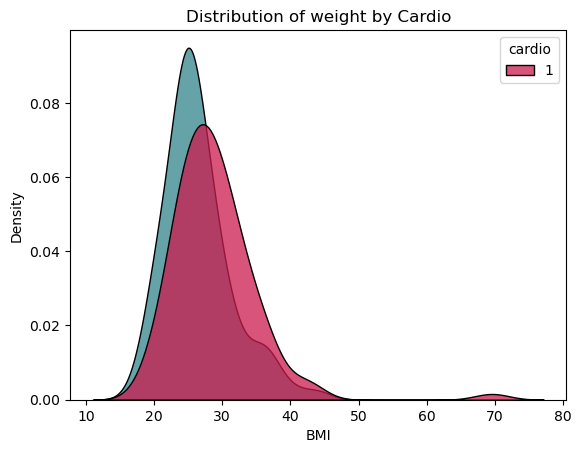

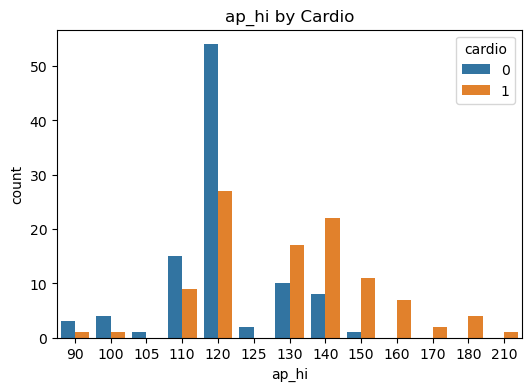

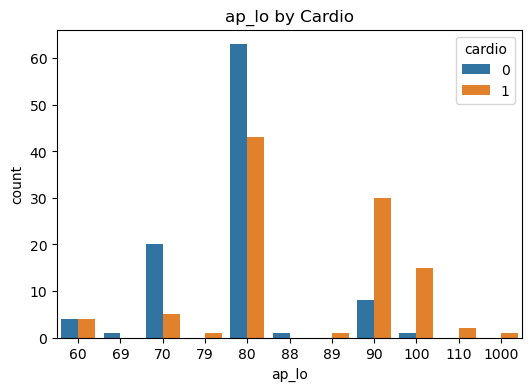

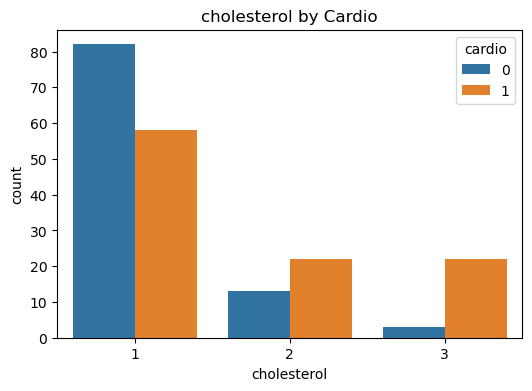

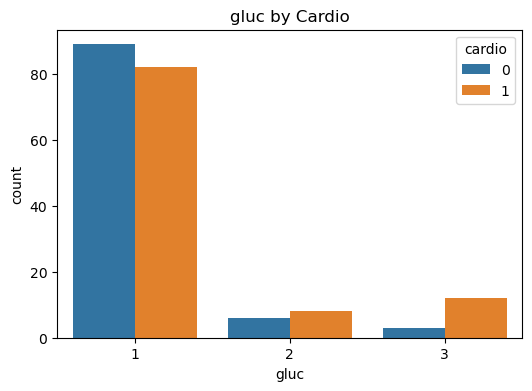

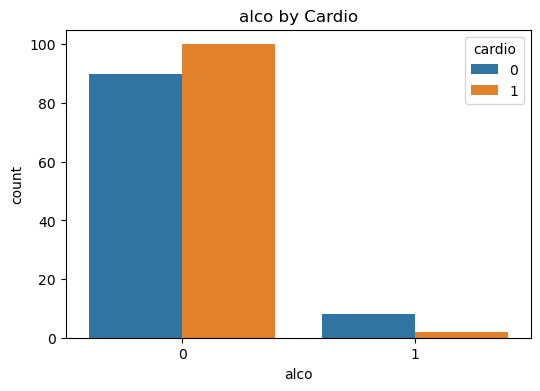

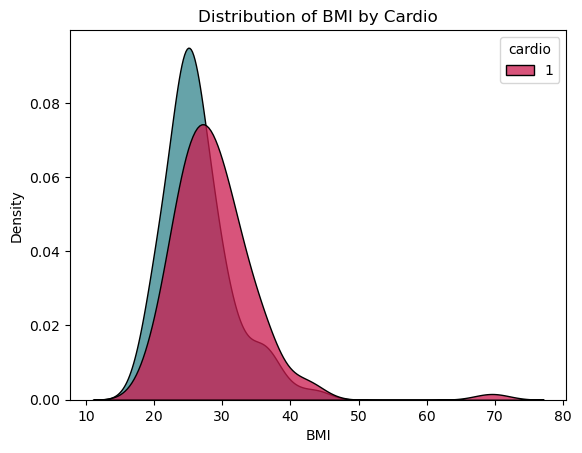

In [31]:
selected_features = features.copy()
selected_features.remove('id')
selected_features.remove('active')
selected_features.remove('height')
selected_features.remove('smoke')
selected_features.remove('gender')

for col in selected_features:
    if(col == 'age' or col == 'weight' or col == 'BMI'):
        sns.kdeplot(data=cardiovascular_disease_df_cp[cardiovascular_disease_df_cp['cardio'] == 0], x=features[i], hue='cardio', multiple="stack", palette="crest", label='Cardio=Not Diagnosed', fill=True)
        sns.kdeplot(data=cardiovascular_disease_df_cp[cardiovascular_disease_df_cp['cardio'] == 1], x=features[i], hue='cardio', multiple="stack", palette="rocket", label='Cardio=Diagnosed', fill=True)
        plt.title(f'Distribution of {col} by Cardio')
    else:
        plt.figure(figsize=(6, 4))
        sns.countplot(data=cardiovascular_disease_df_cp, x=col, hue='cardio')
        plt.title(f'{col} by Cardio')
    plt.show()

When we examine each visualization closely, we can observe a relatively clear difference in the disparity of each feature, as these features have a higher correlation with the target value.

We can observe that all of these features have higher values in participants diagnosed with cardiovascular disease.

### Data Preprocessing

For features with binary numerical values, I prefer to understand what each value represents. So, let’s create a dictionary that explains the meaning of each number for those features.

In [36]:
cardio2name= { 
    0: 'Healthy', 1: 'Diagnosed'
}
gender2name= { 
    1: 'Female', 2: 'Male'
}
smokingAndAlco2name= { 
    0: 'No', 1: 'Yes'
}
activity2name= { 
    0: 'Inactive', 1: 'Active'
}

Now, let’s confirm that there are two classes based on cardiovascular disease status.

In [38]:
array_of_df = cardiovascular_disease_df.copy().to_numpy()
array_cardio = cardiovascular_disease_df.cardio.copy().to_numpy()
represent_each_class = np.sort(np.unique(array_cardio))
n_samples, n_features = array_of_df.shape
plot_array = np.empty([2, n_features])

for i, k in enumerate(represent_each_class):
    indices = np.where(array_cardio == k)[0]
    X_k = array_of_df[indices[0]]
    plot_array[i] = X_k

for i in range(len(plot_array)):
    print("------------------------------------------------" + "Class: " + cardio2name[plot_array[i][12]] + "------------------------------------------------")
    print("Age:", plot_array[i][1])
    print("Gender:", gender2name[plot_array[i][2]])
    print("Height:", plot_array[i][3],"cm")
    print("Weight:", plot_array[i][4],"kg")
    print("Systolic blood pressure:",plot_array[i][5])
    print("Diastolic blood pressure:",plot_array[i][6])
    print("Cholesterol:",plot_array[i][7])
    print("Glucose:",plot_array[i][8])
    print("Smoking:",smokingAndAlco2name[plot_array[i][9]])
    print("Alcohol intake:",smokingAndAlco2name[plot_array[i][10]])
    print("Physical activity:",activity2name[plot_array[i][11]])

------------------------------------------------Class: Healthy------------------------------------------------
Age: 50.391780821917806
Gender: Male
Height: 168.0 cm
Weight: 62.0 kg
Systolic blood pressure: 110.0
Diastolic blood pressure: 80.0
Cholesterol: 1.0
Glucose: 1.0
Smoking: No
Alcohol intake: No
Physical activity: Active
------------------------------------------------Class: Diagnosed------------------------------------------------
Age: 55.41917808219178
Gender: Female
Height: 156.0 cm
Weight: 85.0 kg
Systolic blood pressure: 140.0
Diastolic blood pressure: 90.0
Cholesterol: 3.0
Glucose: 1.0
Smoking: No
Alcohol intake: No
Physical activity: Active


Now we can see that both dictionaries work and that there are two classes based on cardiovascular disease status.

### Data Splitting

In [41]:
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [42]:
def addBias(X: List[int]):
    rows, columns = X.shape
    bias = np.ones((rows, 1))
    return np.hstack((bias, X))

Now I am creating a function to preprocess the entire dataset.

In [44]:
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets PCA preprocessed data for training, validation, and testing

        Returns:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    X = cardiovascular_disease_df.drop('cardio', axis=1).values
    y = cardiovascular_disease_df['cardio'].values

    y = y.reshape(-1, 1)
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(y)
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, one_hot_encoded)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    pca = PCA(n_components=0.9)
    pca.fit_transform(X_trn)
    pca.transform(X_vld)
    pca.transform(X_tst)

    X_trn = addBias(X_trn)
    X_vld = addBias(X_vld)
    X_tst = addBias(X_tst)
    print(X_trn)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [45]:
get_preprocessed_data()

[[ 1.         -1.06275085  0.78712625 ... -0.24114533  0.49430835
  -0.79511359]
 [ 1.         -1.70145596  0.68742001 ... -0.24114533  0.49430835
  -0.83958588]
 [ 1.         -0.31855817  1.56451064 ... -0.24114533  0.49430835
  -0.51086276]
 ...
 [ 1.         -0.39812376  0.76523951 ... -0.24114533  0.49430835
   0.43060138]
 [ 1.         -0.63225219  0.68012443 ... -0.24114533  0.49430835
   0.27968919]
 [ 1.         -0.17195536  1.33875303 ... -0.24114533  0.49430835
   0.86855288]]


(array([[ 1.        , -1.06275085,  0.78712625, ..., -0.24114533,
          0.49430835, -0.79511359],
        [ 1.        , -1.70145596,  0.68742001, ..., -0.24114533,
          0.49430835, -0.83958588],
        [ 1.        , -0.31855817,  1.56451064, ..., -0.24114533,
          0.49430835, -0.51086276],
        ...,
        [ 1.        , -0.39812376,  0.76523951, ..., -0.24114533,
          0.49430835,  0.43060138],
        [ 1.        , -0.63225219,  0.68012443, ..., -0.24114533,
          0.49430835,  0.27968919],
        [ 1.        , -0.17195536,  1.33875303, ..., -0.24114533,
          0.49430835,  0.86855288]]),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[ 1.        , -1.22181282,  1.63138678, ..., -0.24114533,
          0.49430835, -1.24446422],
        [ 1.        , -0.62429217,  0.07094365, ..., -0.24114533,
         -2.02302872, -0.17419565],
        [ 1.        , -1.58344001,  0.70241648

Now I want to use the top 8 features with the highest correlation values.

In [47]:
def get_preprocessed_data_top8() -> Tuple[np.ndarray]:
    """ Gets PCA preprocessed data for training, validation, and testing

        Returns:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    X = cardiovascular_disease_df.drop(['cardio', 'id', 'active', 'height', 'smoke', 'gender'],  axis=1).values
    y = cardiovascular_disease_df['cardio'].values

    y = y.reshape(-1, 1)
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(y)

    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, one_hot_encoded)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    pca = PCA(n_components=0.9)
    pca.fit_transform(X_trn)
    pca.transform(X_vld)
    pca.transform(X_tst)

    X_trn = addBias(X_trn)
    X_vld = addBias(X_vld)
    X_tst = addBias(X_tst)
    print(X_trn)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [48]:
get_preprocessed_data_top8()

[[ 1.          0.78712625 -0.63895256 ...  1.34380136 -0.24114533
  -0.79511359]
 [ 1.          0.68742001 -0.63895256 ... -0.39796177 -0.24114533
  -0.83958588]
 [ 1.          1.56451064 -0.63895256 ... -0.39796177 -0.24114533
  -0.51086276]
 ...
 [ 1.          0.76523951  0.48063624 ...  3.08556449 -0.24114533
   0.43060138]
 [ 1.          0.68012443 -0.14913246 ... -0.39796177 -0.24114533
   0.27968919]
 [ 1.          1.33875303  0.90048204 ... -0.39796177 -0.24114533
   0.86855288]]


(array([[ 1.        ,  0.78712625, -0.63895256, ...,  1.34380136,
         -0.24114533, -0.79511359],
        [ 1.        ,  0.68742001, -0.63895256, ..., -0.39796177,
         -0.24114533, -0.83958588],
        [ 1.        ,  1.56451064, -0.63895256, ..., -0.39796177,
         -0.24114533, -0.51086276],
        ...,
        [ 1.        ,  0.76523951,  0.48063624, ...,  3.08556449,
         -0.24114533,  0.43060138],
        [ 1.        ,  0.68012443, -0.14913246, ..., -0.39796177,
         -0.24114533,  0.27968919],
        [ 1.        ,  1.33875303,  0.90048204, ..., -0.39796177,
         -0.24114533,  0.86855288]]),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[ 1.        ,  1.63138678, -1.54861846, ..., -0.39796177,
         -0.24114533, -1.24446422],
        [ 1.        ,  0.07094365, -0.84887546, ..., -0.39796177,
         -0.24114533, -0.17419565],
        [ 1.        ,  0.70241648, -0.63895256

Now I want to use the top 3 features with the highest correlation values.

In [50]:
def get_preprocessed_data_top3() -> Tuple[np.ndarray]:
    """ Gets PCA preprocessed data for training, validation, and testing

        Returns:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    X = cardiovascular_disease_df.drop(['cardio', 'alco', 'id', 'active', 'height', 'smoke', 'gender', 'ap_lo', 'gluc', 'weight', 'BMI'],  axis=1).values
    y = cardiovascular_disease_df['cardio'].values

    y = y.reshape(-1, 1)
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(y)

    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, one_hot_encoded)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    pca = PCA(n_components=0.9)
    pca.fit_transform(X_trn)
    pca.transform(X_vld)
    pca.transform(X_tst)

    X_trn = addBias(X_trn)
    X_vld = addBias(X_vld)
    X_tst = addBias(X_tst)
    print(X_trn)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [51]:
get_preprocessed_data_top3()

[[ 1.          0.78712625 -0.05586168 -0.54131108]
 [ 1.          0.68742001 -0.05586168 -0.54131108]
 [ 1.          1.56451064 -0.05586168  0.93146532]
 ...
 [ 1.          0.76523951  0.20084982 -0.54131108]
 [ 1.          0.68012443  0.00831619  2.40424172]
 [ 1.          1.33875303  0.07249407 -0.54131108]]


(array([[ 1.        ,  0.78712625, -0.05586168, -0.54131108],
        [ 1.        ,  0.68742001, -0.05586168, -0.54131108],
        [ 1.        ,  1.56451064, -0.05586168,  0.93146532],
        ...,
        [ 1.        ,  0.76523951,  0.20084982, -0.54131108],
        [ 1.        ,  0.68012443,  0.00831619,  2.40424172],
        [ 1.        ,  1.33875303,  0.07249407, -0.54131108]]),
 array([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[ 1.        ,  1.63138678, -0.15212849, -0.54131108],
        [ 1.        ,  0.07094365, -0.12003956, -0.54131108],
        [ 1.        ,  0.70241648, -0.12003956, -0.54131108],
        ...,
        [ 1.        , -1.45140035, -0.05586168, -0.54131108],
        [ 1.        ,  1.23458838, -0.05586168, -0.54131108],
        [ 1.        ,  1.24917954,  0.20084982, -0.54131108]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],


Now, we will use a similar approach to preprocess the data specifically for the Neural Network model.

In [53]:
def get_preprocessed_data_NN() -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None

    X = cardiovascular_disease_df.drop('cardio', axis=1).values
    y = cardiovascular_disease_df['cardio'].values

    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [54]:
def get_preprocessed_data_NN_top8() -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None

    X = cardiovascular_disease_df.drop(['cardio', 'id', 'active', 'height', 'smoke', 'gender'],  axis=1).values
    y = cardiovascular_disease_df['cardio'].values

    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [55]:
def get_preprocessed_data_NN_top3() -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None

    X = cardiovascular_disease_df.drop(['cardio', 'alco', 'id', 'active', 'height', 'smoke', 'gender', 'ap_lo', 'gluc', 'weight', 'BMI'],  axis=1).values
    y = cardiovascular_disease_df['cardio'].values

    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In the preprocessing pipeline for this project, I added a new feature derived from existing ones and visualized the distribution and correlation of all features with the diagnostic outcome. This helped identify which features to use for accurate predictions while also simplifying the model to keep it as transparent as possible. Since we observed that several features had an absolute correlation value below 0.1, dropping these features could help reduce noise and improve model performance. For logistic regression, I standardized the data and applied Principal Component Analysis (PCA) to extract the most useful traits from the dataset while retaining the most important information. For the neural network, I prepared three different functions to support feature selection options and also standardized the data for consistency and improved training performance.

## Methods

In this section I will use Logistic Regression. \
In class, we learned that logistic regression is a supervised machine learning algorithm used for classification. It is unique because it uses the sigmoid function, which returns a probability value between 0 and 1 based on the independent variable inputs. Since my label for Cardiovascular Disease is either 0 or 1, I thought this algorithm was the best fit for my project. Additionally I use Neural Network as my second algorithm since I wanted to get more knowlege and practice of it but it can handle more complex, non-linear relationship that logistic regression may not be able to handle.

#### Logistic Regression
Logistic regression is a supervised machine learning algorithm used for classification tasks. Its goal is to predict the probability of an instance belonging to a target class. Since this project aims to predict cardiovascular disease status, logistic regression matchs well with purpose of project and is a good algorithm to use. It is a statistical method that predicts a binary outcome by analyzing the relationship between independent and dependent variables.

The key characteristic of logistic regression is the use of the sigmoid function. This function returns probability values ranging from 0 to 1 based on the input of independent variables. The equation is provided in the logistic regression notes and is as follows:

$$
\begin{align}
P(y \mid \xv; \wv) = f(\xv; \wv) = a &=  \frac{1}{1 + e^{-z}} \\
&= \frac{1}{1 + e^{-\wv^\top \xv}} 
\end{align}
$$

$$
\begin{align}
P(y \mid \xv; \wv) = f(\xv; \wv) = a &= \frac{e^z}{1 + e^{z}} \\
&= \frac{e^{\wv^\top \xv}}{1 + e^{\wv^\top \xv}} 
\end{align}
$$

The difference between these two equations is that $\frac{e^z}{1 + e^{z}}$ helps prevent overflow when $z$ is a very large positive value, while $\frac{1}{1 + e^{z}}$ helps prevent overflow when $z$ is a very small negative value. The sigmoid function is also known as the activation function used in logistic regression.

In addition to the sigmoid function, we use the Binary Negative Log Likelihood (NLL) as the loss function. The formula is provided in the notes:

$$
NLL(\wv) = - \frac{1}{N}\sum_{n=1}^{N} {y_n}\log[f(\xv_n;\wv)] + ({1 - y_n})\log[1 - f(\xv_n;\wv)] 
$$

Here, $f(x; w)$ indicates the predicted probability of the positive class and ranges between 0 and 1. A smaller predicted probability results in a larger loss value, while a higher predicted probability leads to a smaller loss value. One of the advantages of NLL is its compatibility with gradient descent, which makes it useful for updating model weights during training.

Logistic regression can also be extended to multi-class classification problems by using the softmax activation function. Softmax is a generalization of the sigmoid function for handling multiple classes. However, since I am predicting cardiovascular disease status which is a binary classification task, I use logistic regression with the sigmoid function.

#### Neural Networks

The perceptron is a fundamental component of neural networks and is often considered similar to a biological neuron. It computes the dot product of input features and their corresponding weights. Then, an activation function is applied to convert the continuous value into discrete outputs such as [-1, 1], based on a defined threshold. The neuron in a neural network is very similar to a perceptron. Each input is assigned a weight, forming a linear combination, as described by the following equation from the notes:

$$
Z = W^T X + b
$$

After computing this linear combination, an activation function will be applied, and the resulting value is passed as the input to the next layer.

A neural network consists of an input layer, one or more hidden layers, and an output layer.
* The input layer receives the input data.
* The hidden layers, which will be between the input and output layers, are where most of the learning occurs. You can choose the number of hidden layers to stack depending on the complexity of the problem.
According to this Medium article, the number of neurons in the hidden layer should typically fall between the size of the input and output layers.
* The output layer contains neurons that produce the final prediction.

The non-linear activation function is one of the most important components of a neural network because it allows the network to model complex, non-linear relationships. Several activation functions exist, and in this class, we have covered sigmoid, tanh, and linear activation functions.

As explained in the logistic regression section, the sigmoid activation function outputs values in the range of 0 to 1. However, it does not perform well in neural networks for two main reasons:
- The mean of the sigmoid function is 0.5, while it is recommended to standardize data to have a mean of 0.
- The sigmoid function saturates near 0 and 1, which causes its derivatives to approach zero. This leads to the disappearing gradient problem during training.

The tanh activation function is similar to the sigmoid but returns values in the range [-1, 1], which provides mean of 0. This makes it a better choice than sigmoid. However, it still suffers from the saturation problem. The equation is as follows:

$$
\begin{align}
g(z) &= \tanh(z) \\
&= \frac{e^z - e^{-z}}{e^z + e^{-z}}
\end{align}
$$

$$
\begin{align}
g'(z) &=  1 - \tanh^2(z)
\end{align}
$$

The linear activation function is used when no activation is desired. In this case, the output is equal to the input, which can be useful for output layers in regression tasks.

The goal of the neural network is to compute the output from each layer effectively. According to the notebook, the prediction is computed as follows:
- Compute $\Zm^{[1]}$ and apply the tanh activation function g:
$$
Z^{[1]} = XW^{[1]} + b^{[1]}
A^{[1]} = g(Z^{[1]})
$$
- Compute $\Zm^{[2]}$, the input to the output layer. Since we do not apply an activation function to the output neuron, we use a linear activation:

$$
Z^{[2]} = A^{[1]}W^{[2]} + b^{[2]}
A^{[2]} = f(Z^{[2]})
$$

The final prediction $\hat{y}$ is equal to  $\Am^{[2]}$ .

### Visualization functions

In [62]:
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None,
    figsize: Tuple = (10, 5)
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

            figsize: A tuple for setting the width and height of the plot.

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten()
    y_hat = y_hat.flatten()
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    fig, ax = plt.subplots(figsize=figsize)  
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True, fmt='g', ax=ax)
    plt.show()
    return cfm_df

### Batcges function

In [64]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

### Logistic Regression

#### Activation Functions

In [67]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    return (np.power(math.e, z) / (1 + np.power(math.e, z)))

In [68]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    """ Computes the average generalized NLL Loss

        Args:
            y: The ground truth one-hot encoded labels
                given as matrix of shape (N, K).

            probs: The predicted probabilities for the
                corresponding labels given as a matrix
                of shape (N, K)
        Returns:
            A NLL loss given as a float.
    """
    sum_of_loss = 0.0
    dim = y.ndim

    if dim == 1:
        N = 1
        K = len(y)
        sum_of_loss = sum_of_loss + (y * np.log(probs))
        loss = np.sum((-1) * (1 / N) * sum_of_loss)

    if dim == 2:
        N, K = y.shape
        for n in range(N):
            sum_of_loss = sum_of_loss + (y[n] * np.log(probs[n]))
        loss = np.sum((-1) * (1 / N) * sum_of_loss)

    return loss

In [69]:
class LogisticxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:

            alpha: learning rate or step size.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent.
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            W: Matrix of weights with shape (M, K) 

            trn_loss: Stores the training loss for each epoch.

            vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):

        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    
    def fit(
         self, 
         X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """ Trains softmax regressio using SGD
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector

                X_vld: Validation data given as a 2D matrix. Used 
                    to compute the validation accuracy for each epoch.

                y_vld: Validation labels given as a 2D matrix. Used 
                    to compute the validation accuracy for each epoch.
                
            Returns:
                The class's own object reference. 
        """
        np.random.seed(self.seed)
        self.trn_loss = []
        self.vld_loss = []

        n_samples, n_features = X.shape
        _, n_class = y.shape
        self.W = np.random.rand(n_features, n_class)

        for e in range(self.epochs):
            batches = get_batches(len(X), self.batch_size)
            for b in batches:
                z = X[b] @ self.W
                y_prob = sigmoid(z)
                self.W = self.W - self.alpha * (1 / len(b)) * X[b].T @ (y_prob - y[b])

            trn_probs = sigmoid(X @ self.W)
            trn_loss = nll_loss(y, trn_probs)
            self.trn_loss.append(trn_loss)
            
            if X_vld is not None and y_vld is not None:
                vld_probs = sigmoid(X_vld @ self.W)
                vld_loss = nll_loss(y_vld, vld_probs)
                self.vld_loss.append(vld_loss)
        
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        z = sigmoid(X @ self.W)
        y_hat = np.argmax(z, axis=1) 
        return y_hat

### Neural Network model

#### Nonlinear Data

In [72]:
def nonlinear_data(n=100, m=3, seed=0):
    """ Toy data for testing """
    X, _ = make_regression(
        n_samples=n, 
        n_features=m, 
        n_informative=1,
        noise=3.5,
        random_state=seed,
    )
    rng = np.random.RandomState(seed)
    X[:, 0] = np.sort(6 * rng.rand(n, 1) - 3, axis=0).reshape(n,)
    y = (2 + .5* X[:, 0]**2 + X[:, 0]) + rng.rand(n)

    return X, y.reshape(-1, 1)

#### Linear Activation

In [74]:
class Linear():
    """ The linear or identity actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the linear activation function """
        return z 
    
    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative for the linear activation function """
        # TODO 3.2
        return np.ones((z.shape))

#### Tanh Activation

In [76]:
class Tanh():
    """ The tanh actionvation function """
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        """ Computes the output of the tanh activation function """
        returnVal = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
        return returnVal
    

    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        """ Computes the derivative of the tanh activation function """
        a = Tanh.activation(z)
        return 1 - np.pow(a, 2)

#### Initialize Weights

In [78]:
def init_weights(
    m_input_features: int, 
    hidden_neurons: int, 
    output_neurons: int, 
) -> Tuple[np.ndarray, ...]:
    """ Initilize the hidden and output layer parameters
        
        Args:
            m_input_features: The number of input features

            hidden_neurons: The number of hidden neurons or units to 
                use in the hidden layer.

            output_neurons: The number of output neurons to use in 
                the output layer.

        Returns:
            A tuple of NumPy arrays containing the weights and biases
            for the hidden and output layers.
    """
    W1, b1, W2, b2 = None, None, None, None
    
    W1 = np.random.uniform(low=-0.5, high=0.5, size=(m_input_features, hidden_neurons))
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(hidden_neurons, output_neurons))
    b1 = np.ones([1, hidden_neurons])
    b2 = np.ones([1, output_neurons])
    
    return W1, b1, W2, b2

#### Forward Pass

In [80]:
def forward(
    X: np.ndarray, 
    W1: np.ndarray, 
    b1: np.ndarray,
    W2: np.ndarray, 
    b2: np.ndarray, 
) -> Tuple[np.ndarray, ...]:
    """ Forward pass for 2 layer neural network
    
        Args:
            X: Input features
            
            W1: Hidden layer weights 
            
            b1: Hidden layer baises

            W2: Output layer weights 
            
            b2: Output layer baises

        Returns:
            A tuple of NumPy arrays containing the linear combination and 
            acitvation outputs for each layer. These are needed to compute 
            the backward pass.
    """
    Z1, A1, Z2, A2 = None, None, None, None
    Z1 =  X @ W1 + b1
    A1 = Tanh.activation(Z1)
    Z2 =  A1 @ W2 + b2
    A2 = Linear.activation(Z2)
    
    return Z1, A1, Z2, A2

#### Backward Pass

In [82]:
def output_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the output layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the output layer weights and biases.
    """
    if y.ndim == 1:
        y = y.reshape(-1, 1)
        
    W2_avg_grad, b2_avg_grad = None, None
    W2_avg_grad = (A1.T  @ ((A2 - y) * (Linear.derivative(Z2)))) / len(y) 
    b2_avg_grad = ((np.ones([len(y), 1])).T @ ((A2 - y) * (Linear.derivative(Z2)))) / len(y) 
    
    return W2_avg_grad, b2_avg_grad

In [83]:
def hidden_layer_grads(
    X: np.ndarray,
    y: np.ndarray,
    W1: np.ndarray,
    Z1: np.ndarray,
    A1: np.ndarray,
    W2: np.ndarray,
    Z2: np.ndarray,
    A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    """ Compute gradients for the hidden layer parameters
        
        Note:
            You might not use all the passed arguments!
    
        Args:
            X: Input data given as a matrix
            
            y: Ground truth labels given as a column vector

            W1: Hidden layer weights
            
            Z1: Linear combination output for hidden layer

            A1: Activation output for hidden layer
            
            W2: Output layer weights

            Z2: Linear combination output for the output layer

            A2: Activation output or the output layer. Also 
                referred to as y_hat.
            
        Return:
            A tuple of NumPy arrays containing the average gradient 
            for the hidden layer weights and biases.
    """
    '''
    When I was debuging it found:
    A2 shape: (128, 1)
    y shape: (128, 2)
    Z2 shape: (128, 1)
    W2.T shape: (1, 80)
    Linear.derivative(Z2).shape: (128, 1)
    So I need to mutch y to A2
    '''
    if y.ndim == 2 and y.shape[1] != 1:
        y = y[:, :1]
    elif y.ndim == 1:
        y = y.reshape(-1, 1)
        
    W1_avg_grad, b1_avg_grad = None, None
    W1_avg_grad = (X.T @ ((((A2 - y) * (Linear.derivative(Z2))) @ W2.T) * (Tanh.derivative(Z1)))) / len(y)
    b1_avg_grad = ((np.ones([len(y), 1])).T @ ((((A2 - y) * Linear.derivative(Z2)) @ W2.T) * (Tanh.derivative(Z1)))) / len(y)

    return W1_avg_grad, b1_avg_grad

#### Neural Network

In [85]:
class NeuralNetwork():
    def __init__(self,
        hidden_neurons: int,
        output_neurons: int,
        alpha: float, 
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):
        """ A two layer neural network using SGD
            
            Attributes:
                hidden_neurons: Number of hidden units/neurons.
                
                output_neurons: Number of output neuorns
                
                alpha: learning rate or step size.
                
                batch_size: Size of mini-batches for mini-batch gradient
                    descent.
                
                epochs: Number of epochs to run for mini-batch
                    gradient descent.
                    
                seed: Seed to be used for NumPy's np.random.seed() function.
    
                W1: Hidden layer weights with shape (inputs, neurons)
                
                b1: Hidden layer baises with shape (1, neurons)
                
                W2: Output layer weights with shape (inputs, neurons)
                
                b2: Output layer baises with shape (1, neurons)
    
                trn_error: Stores the training error for each epoch.
    
                vld_error: Stores the validation error for each epoch.
        """
        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit(
        self,
        X: np.ndarray, 
        y: np.ndarray,
        X_vld: np.ndarray = None, 
        y_vld:np.ndarray = None,
    ): 
        """ Trains a basic two layer neural network using SGD
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector

                X_vld: Validation data given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.

                y_vld: Validation labels given as a 2D matrix. Used 
                    to compute the validation RMSE for each epoch.
                
            Returns:
                The class's own object reference. 
        """
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        self.W1, self.b1, self.W2, self.b2 = init_weights(m_input_features=X.shape[1], hidden_neurons=self.hidden_neurons, output_neurons=self.output_neurons)
        for e in range(self.epochs):
            batches = get_batches(len(X), self.batch_size)
            for b in batches:
                Z1, A1, Z2, A2 = forward(X=X[b],W1=self.W1,b1=self.b1,W2=self.W2,b2=self.b2)
                W2_avg_grad, b2_avg_grad = output_layer_grads(X=X[b], y=y[b], W1=self.W1, Z1=Z1, A1=A1, W2=self.W2, Z2=Z2, A2=A2)
                W1_avg_grad, b1_avg_grad = hidden_layer_grads(X=X[b], y=y[b], W1=self.W1, Z1=Z1, A1=A1, W2=self.W2, Z2=Z2, A2=A2)
                self.W2 = self.W2 - self.alpha * W2_avg_grad
                self.b2 = self.b2 - self.alpha * b2_avg_grad
                self.W1 = self.W1 - self.alpha * W1_avg_grad
                self.b1 = self.b1 - self.alpha * b1_avg_grad

            trn_preds = self.predict(X)
            trn_error = rmse(y, trn_preds)
            self.trn_error.append(trn_error)
            
            if X_vld is not None and y_vld is not None:
                vld_preds = self.predict(X_vld)
                vld_error = rmse(y_vld, vld_preds)
                self.vld_error.append(vld_error)
        
        return self
    
    def predict(self, X: np.ndarray):
        """ Make predictions using forward pass.

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        Z1, A1, Z2, A2 = forward(X=X,W1=self.W1,b1=self.b1,W2=self.W2,b2=self.b2)
        return A2
        

## Experiment

#### Hypothesis
My hypothesis for both the logistic regression and neural network models is that as I narrow the features to those with higher correlation (from all features to the top 8, then to the top 3), model performance will improve. This is because selecting only the most correlated features helps remove noise from the dataset, leading to more accurate predictions. I was not certain which model would perform better, but since neural networks are generally more capable of capturing complex relationships in data, I expected the neural network model to achieve higher accuracy.

#### Experimental Setup
Initially, I ran the logistic regression model with three different processed datasets which are the entire dataset, a dataset with the top 8 features with the highest correlation values, and another with the top 3 features. I then applied the same approach to the neural network model. To compare performances, I also used a neural network model from TensorFlow to see if there was any difference between it and my custom neural network. For the TensorFlow model, I tested both the entire dataset and the dataset with the top 8 selected features to observe any performance differences. Next, I selected features based on the CDC article about heart disease risk factors and ran both logistic regression and neural network models using those features. I experimented with different numbers of neurons to see if that impacted performance and to determine the optimal number of neurons for the CDC-based feature set. Finally, I compared results using another dataset that had fewer samples but included symptoms, not just regular measured body statistics.

#### Logistic Regression

[[ 1.         -1.06275085  0.78712625 ... -0.24114533  0.49430835
  -0.79511359]
 [ 1.         -1.70145596  0.68742001 ... -0.24114533  0.49430835
  -0.83958588]
 [ 1.         -0.31855817  1.56451064 ... -0.24114533  0.49430835
  -0.51086276]
 ...
 [ 1.         -0.39812376  0.76523951 ... -0.24114533  0.49430835
   0.43060138]
 [ 1.         -0.63225219  0.68012443 ... -0.24114533  0.49430835
   0.27968919]
 [ 1.         -0.17195536  1.33875303 ... -0.24114533  0.49430835
   0.86855288]]
Training accuracy: 0.7157366071428571


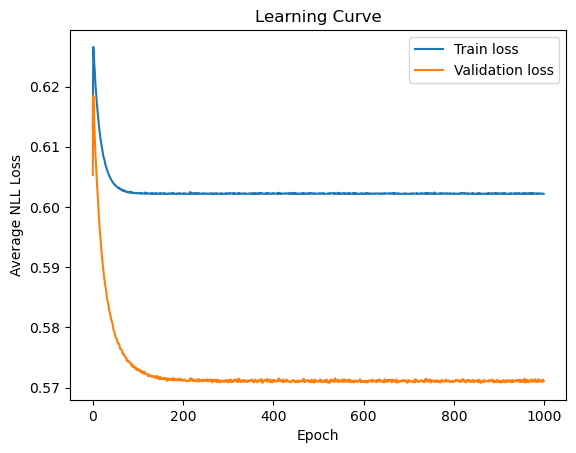

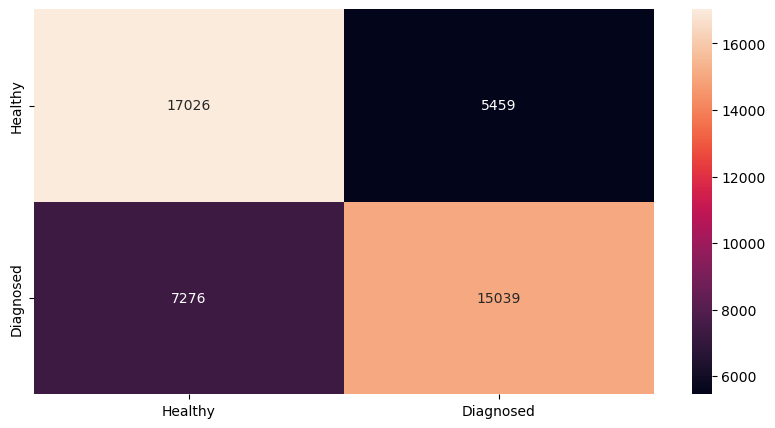

In [88]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data() #Load the training, validation, and test datasets.
softreg = LogisticxRegression(epochs=1000, batch_size=32, alpha=.01, seed=42) #nitialize an instance of LogisticxRegression().
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat = softreg.predict(X_trn)

acc = accuracy_score(np.argmax(y_trn, axis=1), y_hat)
print("Training accuracy:", acc)

plt.plot(softreg.trn_loss, label='Train loss')
plt.plot(softreg.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

y_trn_cfm = np.argmax(y_trn, axis=1)
cfm = plot_confusion_matrix(y_trn_cfm, y_hat, cardio2name)

Validation accuracy: 0.7219642857142857


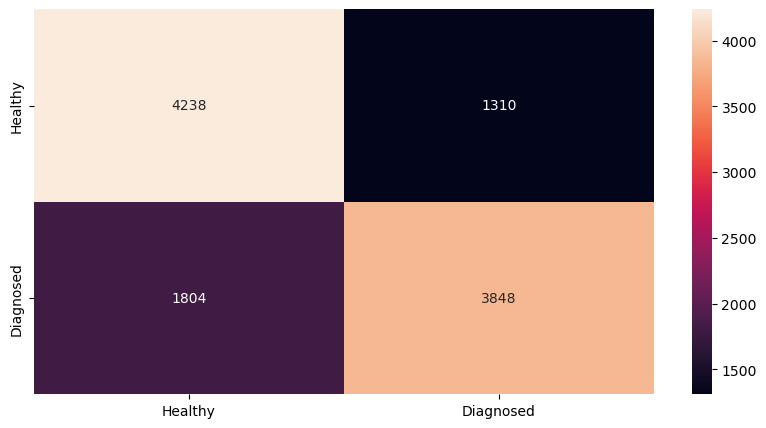

In [89]:
y_hat = softreg.predict(X_vld)
acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
print("Validation accuracy:", acc)

y_vld_cfm = np.argmax(y_vld, axis=1)
cfm = plot_confusion_matrix(y_vld_cfm, y_hat, cardio2name)

Testing accuracy: 0.7207857142857143


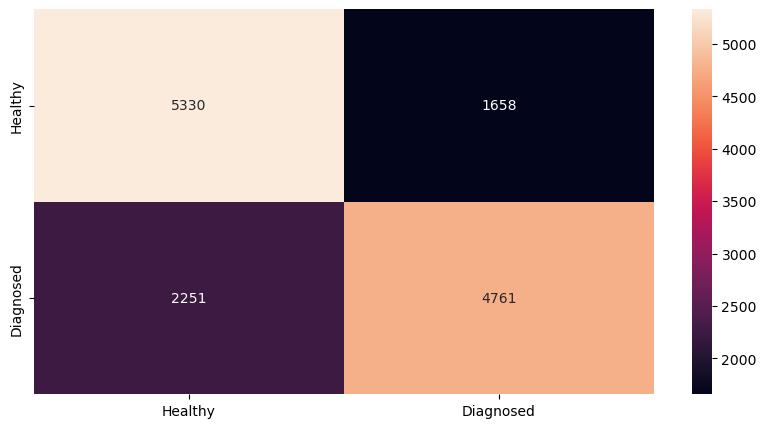

In [90]:
y_hat = softreg.predict(X_tst)
acc = accuracy_score(np.argmax(y_tst, axis=1), y_hat)
print("Testing accuracy:", acc)

y_tst_cfm = np.argmax(y_tst, axis=1)
cfm = plot_confusion_matrix(y_tst_cfm, y_hat, cardio2name)

Now train model with top 8 features that has higher correlation with results of Cardiovascular Disease

[[ 1.          0.78712625 -0.63895256 ...  1.34380136 -0.24114533
  -0.79511359]
 [ 1.          0.68742001 -0.63895256 ... -0.39796177 -0.24114533
  -0.83958588]
 [ 1.          1.56451064 -0.63895256 ... -0.39796177 -0.24114533
  -0.51086276]
 ...
 [ 1.          0.76523951  0.48063624 ...  3.08556449 -0.24114533
   0.43060138]
 [ 1.          0.68012443 -0.14913246 ... -0.39796177 -0.24114533
   0.27968919]
 [ 1.          1.33875303  0.90048204 ... -0.39796177 -0.24114533
   0.86855288]]
Training accuracy: 0.71546875


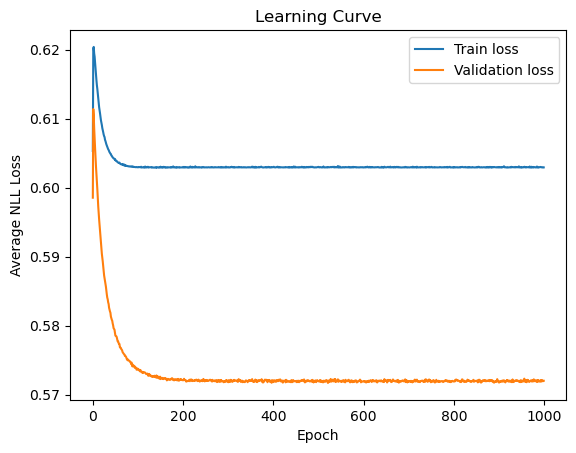

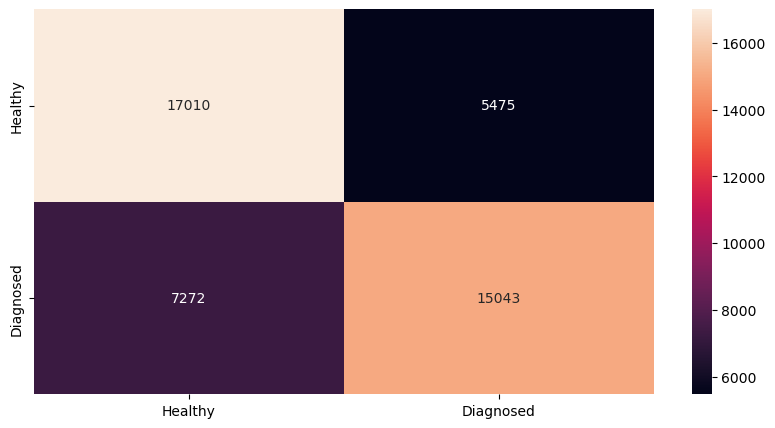

In [92]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_top8() #Load the training, validation, and test datasets.
softreg = LogisticxRegression(epochs=1000, batch_size=32, alpha=.01, seed=42) #nitialize an instance of LogisticxRegression().
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat = softreg.predict(X_trn)

acc = accuracy_score(np.argmax(y_trn, axis=1), y_hat)
print("Training accuracy:", acc)

plt.plot(softreg.trn_loss, label='Train loss')
plt.plot(softreg.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

y_trn_cfm = np.argmax(y_trn, axis=1)
cfm = plot_confusion_matrix(y_trn_cfm, y_hat, cardio2name)

Validation accuracy: 0.7197321428571428


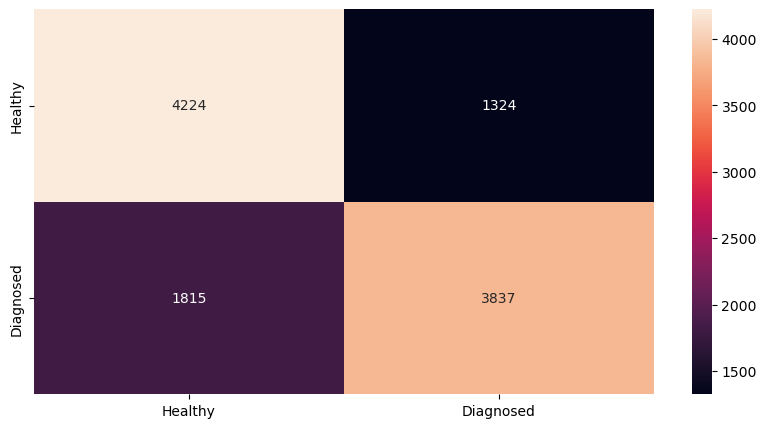

In [93]:
y_hat = softreg.predict(X_vld)
acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
print("Validation accuracy:", acc)

y_vld_cfm = np.argmax(y_vld, axis=1)
cfm = plot_confusion_matrix(y_vld_cfm, y_hat, cardio2name)

Testing accuracy: 0.7186428571428571


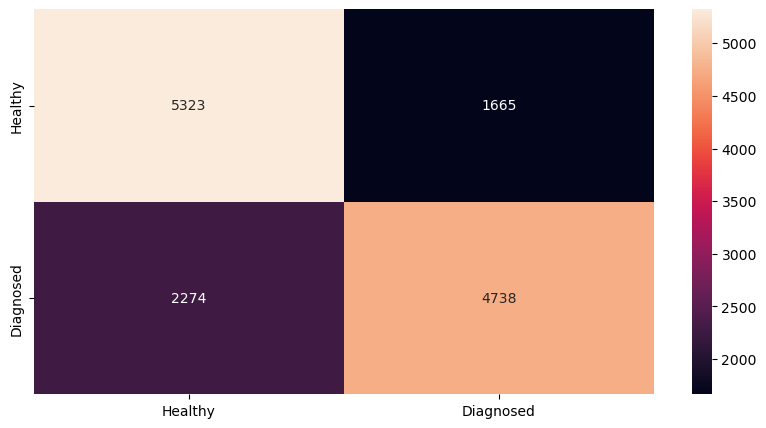

In [94]:
y_hat = softreg.predict(X_tst)
acc = accuracy_score(np.argmax(y_tst, axis=1), y_hat)
print("Testing accuracy:", acc)

y_tst_cfm = np.argmax(y_tst, axis=1)
cfm = plot_confusion_matrix(y_tst_cfm, y_hat, cardio2name)

Now train model with top 3 features that has higher correlation with results of Cardiovascular Disease

[[ 1.          0.78712625 -0.05586168 -0.54131108]
 [ 1.          0.68742001 -0.05586168 -0.54131108]
 [ 1.          1.56451064 -0.05586168  0.93146532]
 ...
 [ 1.          0.76523951  0.20084982 -0.54131108]
 [ 1.          0.68012443  0.00831619  2.40424172]
 [ 1.          1.33875303  0.07249407 -0.54131108]]
Training accuracy: 0.7156026785714286


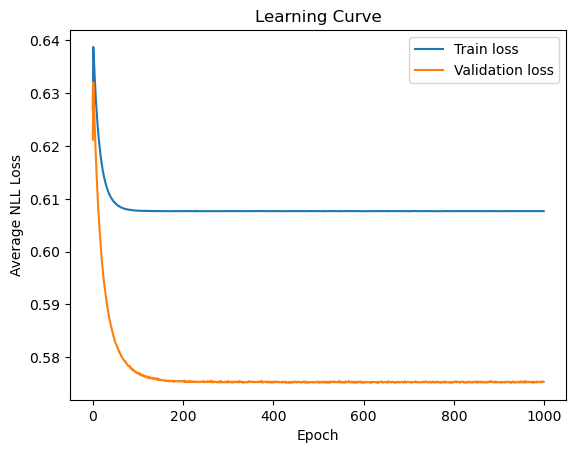

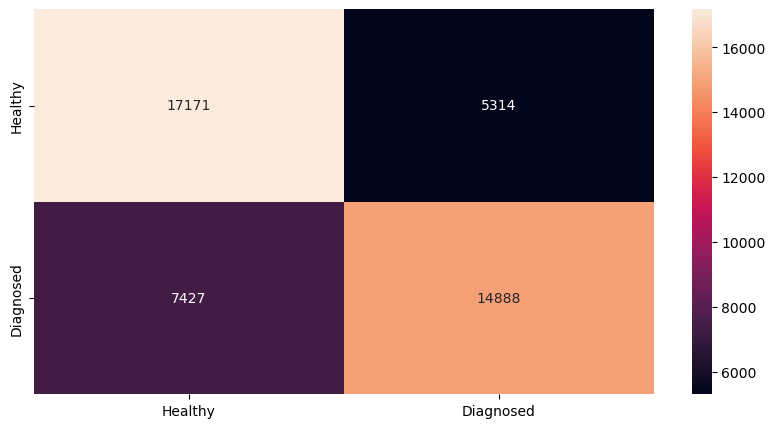

In [96]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_top3() #Load the training, validation, and test datasets.
softreg = LogisticxRegression(epochs=1000, batch_size=32, alpha=.01, seed=42) #nitialize an instance of LogisticxRegression().
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat = softreg.predict(X_trn)

acc = accuracy_score(np.argmax(y_trn, axis=1), y_hat)
print("Training accuracy:", acc)

plt.plot(softreg.trn_loss, label='Train loss')
plt.plot(softreg.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

y_trn_cfm = np.argmax(y_trn, axis=1)
cfm = plot_confusion_matrix(y_trn_cfm, y_hat, cardio2name)

Validation accuracy: 0.7197321428571428


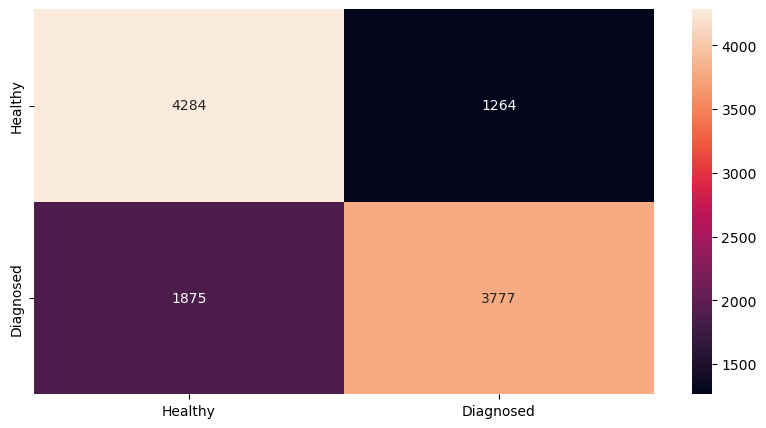

In [97]:
y_hat = softreg.predict(X_vld)
acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
print("Validation accuracy:", acc)

y_vld_cfm = np.argmax(y_vld, axis=1)
cfm = plot_confusion_matrix(y_vld_cfm, y_hat, cardio2name)

Testing accuracy: 0.7211428571428572


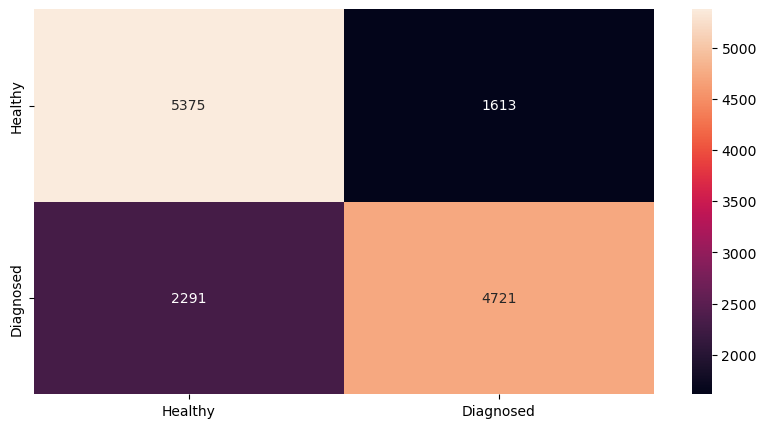

In [98]:
y_hat = softreg.predict(X_tst)
acc = accuracy_score(np.argmax(y_tst, axis=1), y_hat)
print("Testing accuracy:", acc)

y_tst_cfm = np.argmax(y_tst, axis=1)
cfm = plot_confusion_matrix(y_tst_cfm, y_hat, cardio2name)

Lets see if there are difference between Logistic regrassion and neural network.

Train MSE:  0.20307512474941442
Train RMSE:  0.450638574413481
Validation MSE:  0.20396539045690684
Validation RMSE:  0.4516252765921177
Test MSE:  0.2083356979746857
Test RMSE:  0.4564380549151064


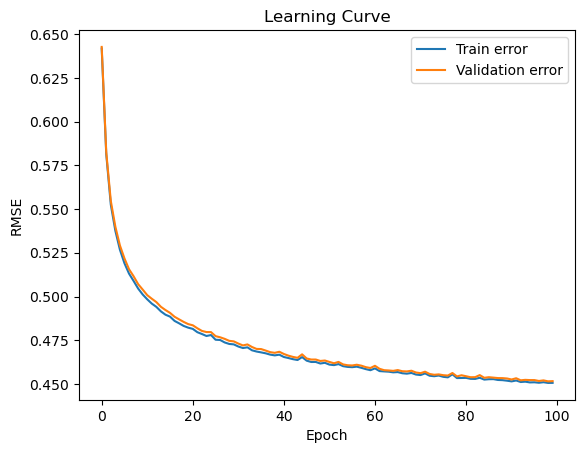

In [100]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_NN()
nn = NeuralNetwork(hidden_neurons=256,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Lets see with top 8 features

Train MSE:  0.19527862217927414
Train RMSE:  0.44190340820056384
Validation MSE:  0.19419892115946133
Validation RMSE:  0.44068006666907605
Test MSE:  0.19745477857094174
Test RMSE:  0.44435883987037067


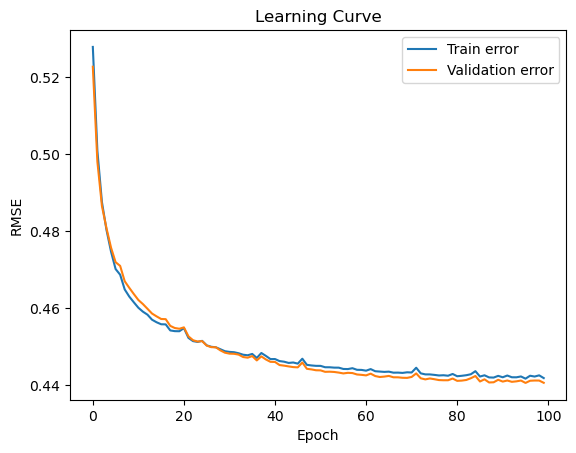

In [102]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_NN_top8()
nn = NeuralNetwork(hidden_neurons=256,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Now lets see top 3

Train MSE:  0.19786751634989241
Train RMSE:  0.44482301688412257
Validation MSE:  0.19401855426753262
Validation RMSE:  0.44047537305453593
Test MSE:  0.19883471137890374
Test RMSE:  0.4459088599466305


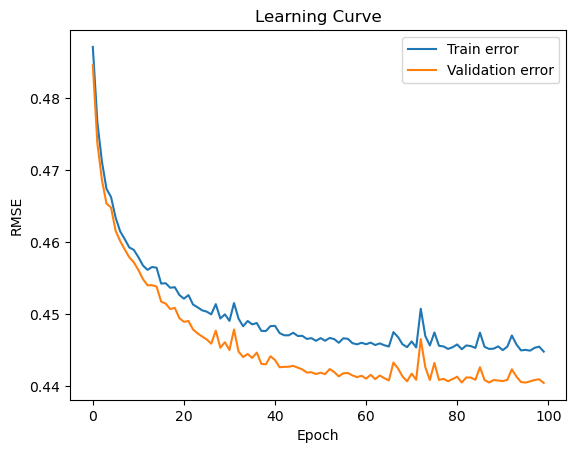

In [104]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_NN_top3()
nn = NeuralNetwork(hidden_neurons=256,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Use TensorFlow

In [106]:
print(f" TensorFlow version: {tf.__version__}")

 TensorFlow version: 2.18.0


In [107]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_NN()

nn = Sequential()
nn.add(Dense(1, activation='sigmoid'))  # Binary classification output
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='logs/test_model')
]

hist = nn.fit(x=X_trn, y=y_trn, batch_size=64, epochs=500, callbacks=callbacks, validation_data=(X_vld, y_vld))

Epoch 1/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.5700 - loss: 0.7054 - val_accuracy: 0.6409 - val_loss: 0.6306
Epoch 2/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.6377 - loss: 0.6380 - val_accuracy: 0.6521 - val_loss: 0.6225
Epoch 3/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6478 - loss: 0.6324 - val_accuracy: 0.6549 - val_loss: 0.6208
Epoch 4/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.6466 - loss: 0.6314 - val_accuracy: 0.6556 - val_loss: 0.6190
Epoch 5/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.6478 - loss: 0.6311 - val_accuracy: 0.6571 - val_loss: 0.6175
Epoch 6/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.6543 - loss: 0.6267 - val_accuracy: 0.6587 - val_loss: 0.6157
Epoch 7/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - accuracy: 0.6560 - loss: 0.6273 - val_accuracy: 0.6596 - val_loss: 0.6144
Epoch 8/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - accuracy: 0.6558 - loss: 0

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 129us/step
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 133us/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 138us/step
Train MSE:  0.1939648927569157
Train RMSE:  0.44041445566297627
Validation MSE:  0.19093144729676412
Validation RMSE:  0.44041445566297627
Test MSE:  0.19249508819233446
Test RMSE:  0.44041445566297627


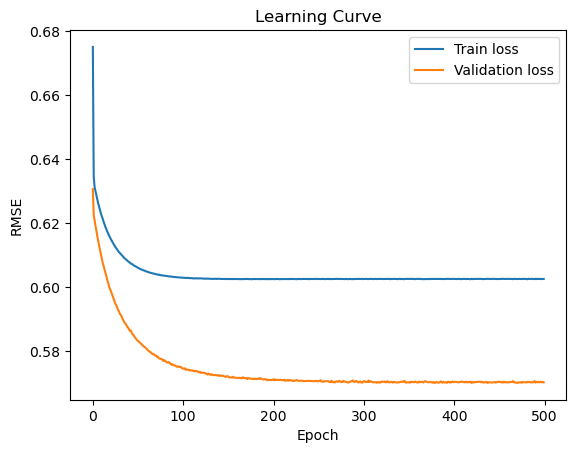

In [108]:
y_hat_trn = nn.predict(X_trn)
y_hat_vld = nn.predict(X_vld) 
y_hat_tst = nn.predict(X_tst)

trn_mse_score = mse(y_trn, y_hat_trn)
vld_mse_score = mse(y_vld, y_hat_vld)
tst_mse_score = mse(y_tst, y_hat_tst)
trn_rmse_score = rmse(y_trn, y_hat_trn)
vld_rmse_score = rmse(y_trn, y_hat_trn)
tst_rmse_score = rmse(y_trn, y_hat_trn)
print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Lets see with top 8 features

In [110]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_NN_top8()

nn = Sequential()
nn.add(Dense(1, activation='sigmoid'))  # Binary classification output
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='logs/test_model')
]

hist = nn.fit(x=X_trn, y=y_trn, batch_size=64, epochs=500, callbacks=callbacks, validation_data=(X_vld, y_vld))

Epoch 1/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.4033 - loss: 0.8834 - val_accuracy: 0.5958 - val_loss: 0.6665
Epoch 2/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.6211 - loss: 0.6547 - val_accuracy: 0.6577 - val_loss: 0.6229
Epoch 3/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - accuracy: 0.6552 - loss: 0.6274 - val_accuracy: 0.6636 - val_loss: 0.6150
Epoch 4/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.6625 - loss: 0.6223 - val_accuracy: 0.6651 - val_loss: 0.6127
Epoch 5/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - accuracy: 0.6629 - loss: 0.6227 - val_accuracy: 0.6663 - val_loss: 0.6111
Epoch 6/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.6599 - loss: 0.6232 - val_accuracy: 0.6667 - val_loss: 0.6099
Epoch 7/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.6603 - loss: 0.6251 - val_accuracy: 0.6710 - val_loss: 0.6085
Epoch 8/500
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.6643 - loss: 0

1400/1400 ━━━━━━━━━━━━━━━━━━━━ 0s 134us/step
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 143us/step
Train MSE:  0.19427950748194112
Train RMSE:  0.44077149123093373
Validation MSE:  0.19134345743789855
Validation RMSE:  0.44077149123093373
Test MSE:  0.19322338310123677
Test RMSE:  0.44077149123093373


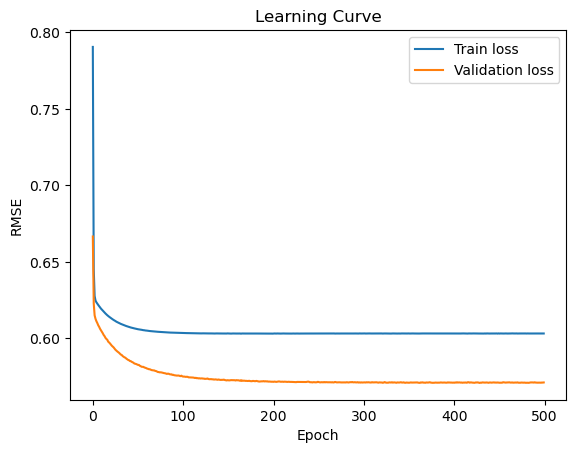

In [111]:
y_hat_trn = nn.predict(X_trn)
y_hat_vld = nn.predict(X_vld) 
y_hat_tst = nn.predict(X_tst)

trn_mse_score = mse(y_trn, y_hat_trn)
vld_mse_score = mse(y_vld, y_hat_vld)
tst_mse_score = mse(y_tst, y_hat_tst)
trn_rmse_score = rmse(y_trn, y_hat_trn)
vld_rmse_score = rmse(y_trn, y_hat_trn)
tst_rmse_score = rmse(y_trn, y_hat_trn)
print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

According to the CDC, heart disease risk factors include high blood pressure, high cholesterol, and smoking, so let’s limit our focus to only those.\
https://www.cdc.gov/heart-disease/risk-factors/index.html

In [113]:
def get_preprocessed_data_CDC() -> Tuple[np.ndarray]:
    """ Gets PCA preprocessed data for training, validation, and testing

        Returns:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    X = cardiovascular_disease_df.drop(['cardio', 'alco', 'id', 'active', 'height', 'age', 'gender', 'gluc', 'weight', 'BMI'], axis=1).values
    y = cardiovascular_disease_df['cardio'].values

    y = y.reshape(-1, 1)
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(y)
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, one_hot_encoded)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    pca = PCA(n_components=0.9)
    pca.fit_transform(X_trn)
    pca.transform(X_vld)
    pca.transform(X_tst)

    X_trn = addBias(X_trn)
    X_vld = addBias(X_vld)
    X_tst = addBias(X_tst)
    print(X_trn)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [114]:
get_preprocessed_data_CDC()
X.shape

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]


(100, 3)

#### Logistic regression model

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Training accuracy: 0.7117857142857142


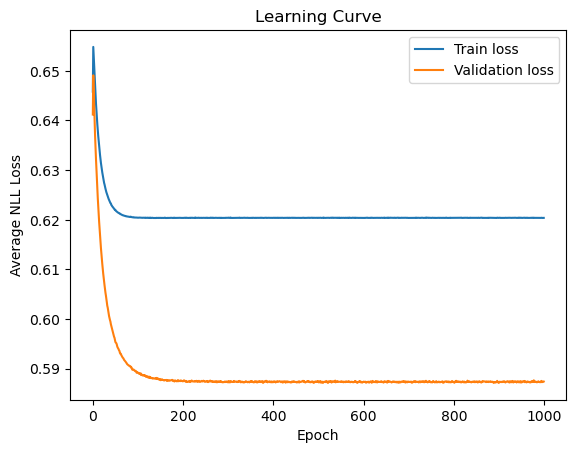

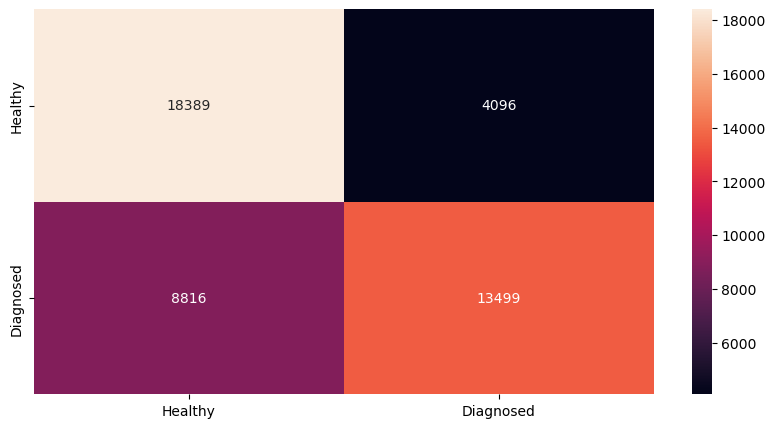

In [116]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC() #Load the training, validation, and test datasets.
softreg = LogisticxRegression(epochs=1000, batch_size=32, alpha=.01, seed=42) #nitialize an instance of LogisticxRegression().
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat = softreg.predict(X_trn)

acc = accuracy_score(np.argmax(y_trn, axis=1), y_hat)
print("Training accuracy:", acc)

plt.plot(softreg.trn_loss, label='Train loss')
plt.plot(softreg.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

y_trn_cfm = np.argmax(y_trn, axis=1)
cfm = plot_confusion_matrix(y_trn_cfm, y_hat, cardio2name)

Validation accuracy: 0.7211607142857143


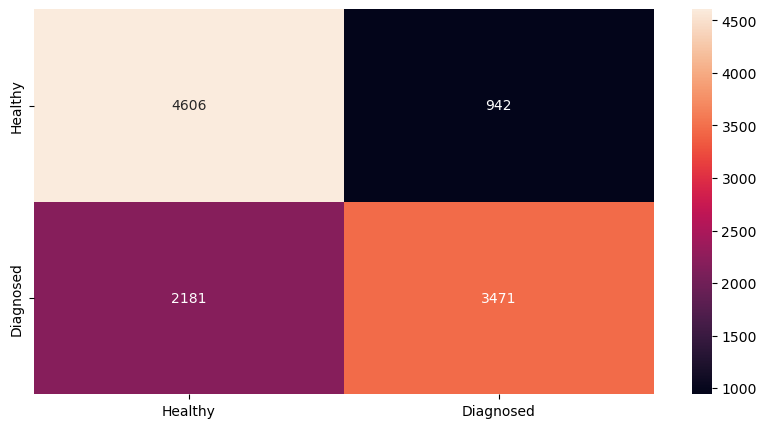

In [117]:
y_hat = softreg.predict(X_vld)
acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
print("Validation accuracy:", acc)

y_vld_cfm = np.argmax(y_vld, axis=1)
cfm = plot_confusion_matrix(y_vld_cfm, y_hat, cardio2name)

Testing accuracy: 0.7138571428571429


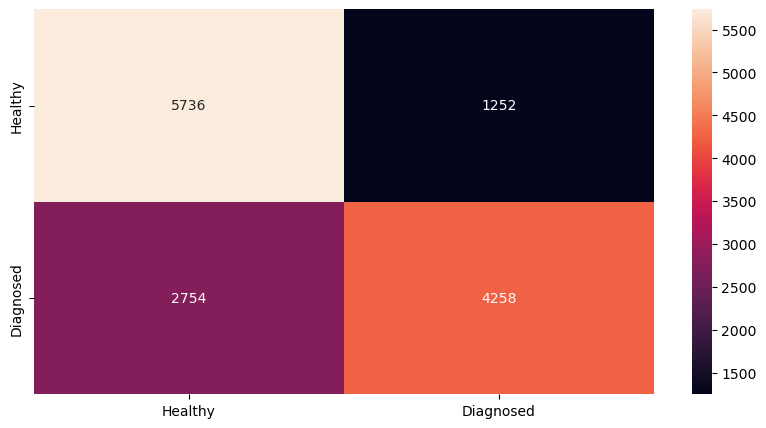

In [118]:
y_hat = softreg.predict(X_tst)
acc = accuracy_score(np.argmax(y_tst, axis=1), y_hat)
print("Testing accuracy:", acc)

y_tst_cfm = np.argmax(y_tst, axis=1)
cfm = plot_confusion_matrix(y_tst_cfm, y_hat, cardio2name)

#### NN

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Train MSE:  0.25256595577602126
Train RMSE:  0.5010942649581307
Validation MSE:  0.24894980846636705
Validation RMSE:  0.4972881761867147
Test MSE:  0.2525813613248181
Test RMSE:  0.5013074578511715


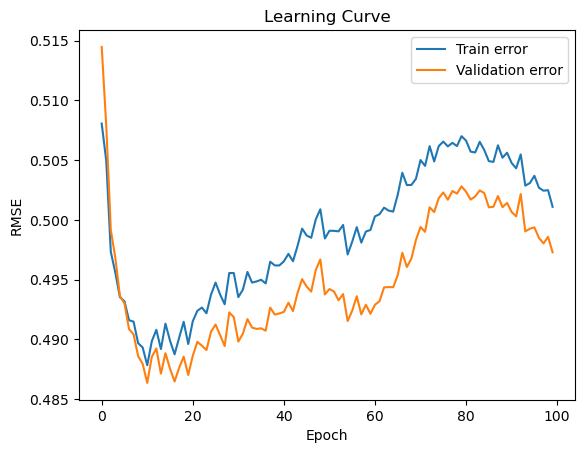

In [120]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC()
nn = NeuralNetwork(hidden_neurons=256,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

Change the number of neurons to observe the difference in results.

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Train MSE:  0.26962279910335396
Train RMSE:  0.5185220539747856
Validation MSE:  0.2616676057166105
Validation RMSE:  0.5106029324734342
Test MSE:  0.27120571541395944
Test RMSE:  0.520191804569547


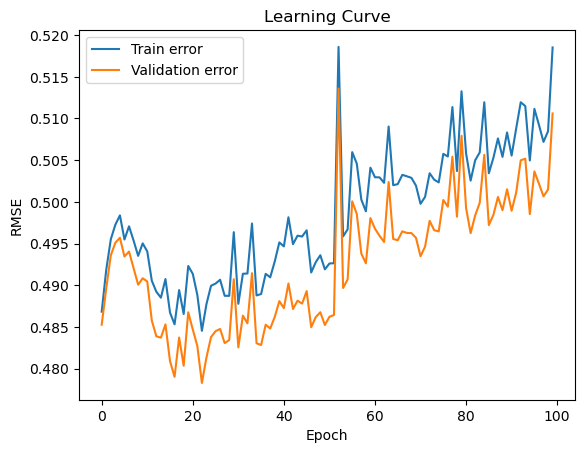

In [122]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC()
nn = NeuralNetwork(hidden_neurons=1024,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Train MSE:  0.2227191450626408
Train RMSE:  0.47167199968981544
Validation MSE:  0.2211346927665715
Validation RMSE:  0.46994474037686274
Test MSE:  0.22360590976365097
Test RMSE:  0.4726362409952939


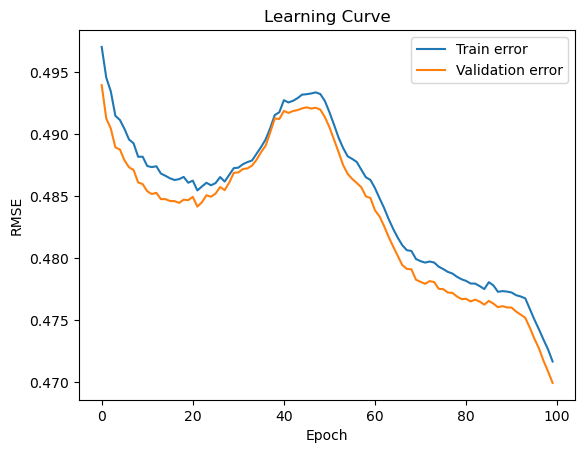

In [123]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC()
nn = NeuralNetwork(hidden_neurons=64,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Train MSE:  0.2236746223996788
Train RMSE:  0.4728429872465718
Validation MSE:  0.22260735415303634
Validation RMSE:  0.47170423519592797
Test MSE:  0.22432559354124806
Test RMSE:  0.47353932367187046


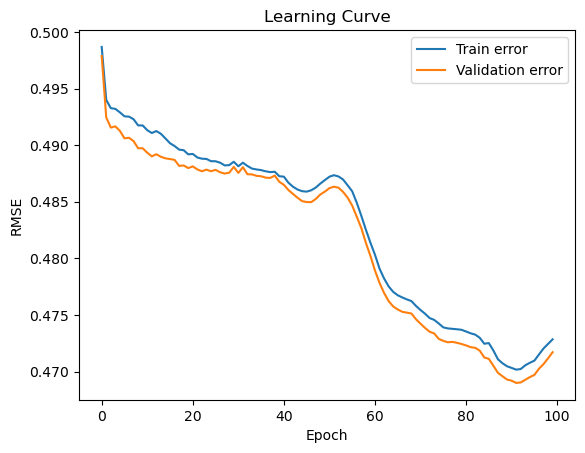

In [124]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC()
nn = NeuralNetwork(hidden_neurons=32,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Train MSE:  0.22628644962640168
Train RMSE:  0.4756718186100872
Validation MSE:  0.2253242211900341
Validation RMSE:  0.4746577568817335
Test MSE:  0.2265423914047094
Test RMSE:  0.4759427825948307


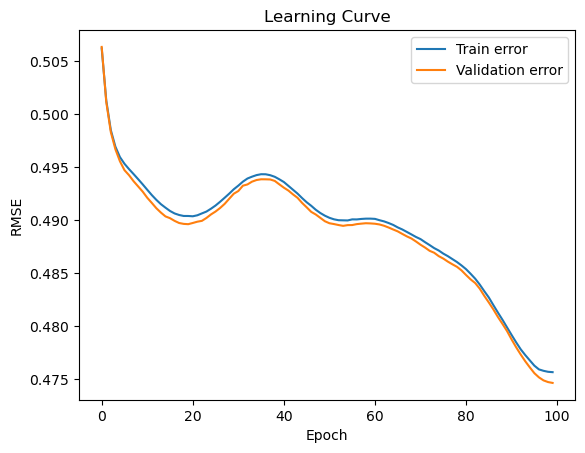

In [125]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC()
nn = NeuralNetwork(hidden_neurons=8,output_neurons=1,batch_size=32,alpha=0.001,epochs=100,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Train MSE:  0.24629205344865335
Train RMSE:  0.496278101471184
Validation MSE:  0.2463104083013019
Validation RMSE:  0.4962965904364933
Test MSE:  0.24640214216475792
Test RMSE:  0.49638900423035875


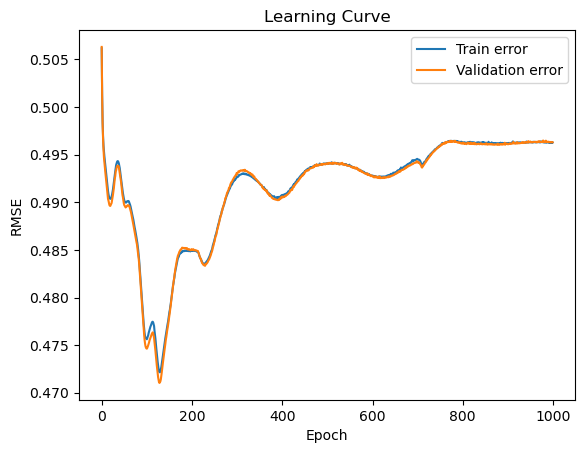

In [126]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC()
nn = NeuralNetwork(hidden_neurons=8,output_neurons=1,batch_size=32,alpha=0.001,epochs=1000,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

[[ 1.         -0.05586168 -0.08269916 -0.54131108 -0.31225186]
 [ 1.         -0.05586168 -0.08269916 -0.54131108  3.20254296]
 [ 1.         -0.05586168 -0.08269916  0.93146532 -0.31225186]
 ...
 [ 1.          0.20084982 -0.03570635 -0.54131108  3.20254296]
 [ 1.          0.00831619 -0.08269916  2.40424172 -0.31225186]
 [ 1.          0.07249407 -0.03570635 -0.54131108 -0.31225186]]
Train MSE:  0.2461355911006773
Train RMSE:  0.496120488447118
Validation MSE:  0.24597844394692514
Validation RMSE:  0.4959620834901753
Test MSE:  0.24613725186463742
Test RMSE:  0.496122162253549


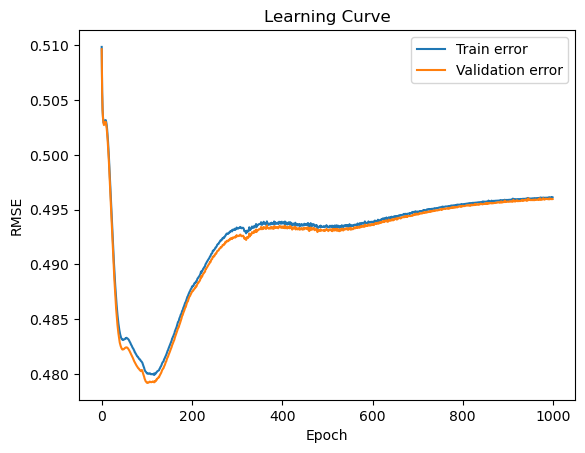

In [127]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_CDC()
nn = NeuralNetwork(hidden_neurons=3,output_neurons=1,batch_size=32,alpha=0.001,epochs=1000,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

### Trying Different datasets

I got data from here: \
Cardiovascular_Disease_Dataset. (2023, December 9). https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset?phase=FinishSSORegistration&returnUrl=%2Fdatasets%2Fjocelyndumlao%2Fcardiovascular-disease-dataset%2Fversions%2F1%3Fresource%3Ddownload&SSORegistrationToken=CfDJ8KvMat0eHzhGoPokVBGB7D0b1Ir1xTLaeBxOS63g_VargkkUy0JKMlDgn4pLtuj0duZ9ZwXXhgwj0A1NVKAxXe-Yht3cNJhJjo5ZZIXh6H8UfaVu6kpUO5WRBSLooM_SNWmVC1bV8vtAfR1rjJYe6ujFAf3MbEpEuQbZ1UgKblAP_EISsT8eNH0bRCZIu-WfWZ4dtAw4lgNc7AqRRkwSbfWksWeMIUiS6PWkZ-BPfQ0HSV3NEG3_tzsBUdmr4fUKa6NN0-KaNPrvKGyUm2bYKdBmc4yaAg2a4KsNvnSgenTkMBGJ-tehC03tPh4yXAL-leJbX7ijDAGczRVItjXSTQzvxO0pNCrj&DisplayName=Hop

In [130]:
cardiovascular_disease_2_df = pd.read_csv("Cardiovascular_Disease_Dataset_2.csv")

In [131]:
cardiovascular_disease_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [132]:
cardiovascular_disease_2_df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


Check data

In [134]:
check_arr = cardiovascular_disease_2_df.to_numpy()
clean_data = True
n_samples, n_features = check_arr.shape
for i in range(n_features):
    null_check = check_null(check_arr, i)
    if(null_check):
        clean_data = False

if(clean_data):
    print("No Null in the dataset.")
else:
    print("Required to clean the dataset.")

No Null in the dataset.


#### Visualization of correlation

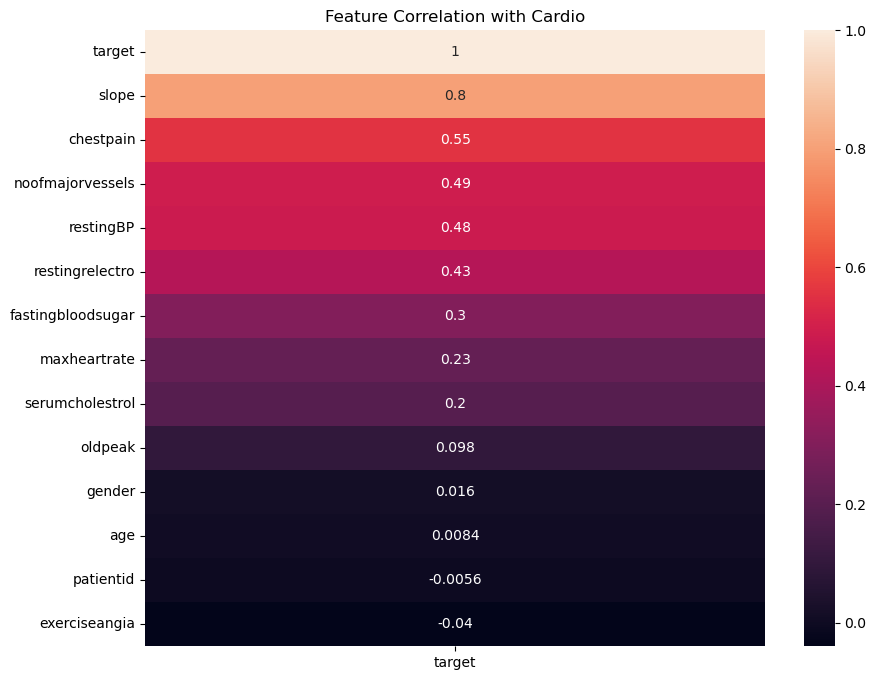

In [136]:
corr = cardiovascular_disease_2_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap="rocket")
plt.title("Feature Correlation with Cardio")
plt.show()

#### Data Preprocessing

In [138]:
def get_preprocessed_data_2() -> Tuple[np.ndarray]:
    """ Gets PCA preprocessed data for training, validation, and testing

        Returns:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    X = cardiovascular_disease_2_df.drop('target', axis=1).values
    y = cardiovascular_disease_2_df['target'].values

    y = y.reshape(-1, 1)
    encoder = OneHotEncoder(sparse_output=False)
    one_hot_encoded = encoder.fit_transform(y)
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, one_hot_encoded)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    pca = PCA(n_components=0.9)
    pca.fit_transform(X_trn)
    pca.transform(X_vld)
    pca.transform(X_tst)

    X_trn = addBias(X_trn)
    X_vld = addBias(X_vld)
    X_tst = addBias(X_tst)
    print(X_trn)
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [139]:
get_preprocessed_data_2()

[[ 1.         -0.41902285 -1.44403519 ... -1.00803967 -0.51414953
   0.81588581]
 [ 1.          1.20099444  1.08397001 ... -0.77524025  0.48906907
  -0.21402922]
 [ 1.         -1.3754675  -0.71372258 ... -0.01864214  1.49228766
   1.84580083]
 ...
 [ 1.         -0.33945263  1.42103737 ...  0.33055699  0.48906907
  -0.21402922]
 [ 1.         -0.95765816  0.69072475 ... -0.89163996 -0.51414953
  -0.21402922]
 [ 1.         -0.1093695   1.58957105 ... -0.42604112 -0.51414953
  -0.21402922]]


(array([[ 1.        , -0.41902285, -1.44403519, ..., -1.00803967,
         -0.51414953,  0.81588581],
        [ 1.        ,  1.20099444,  1.08397001, ..., -0.77524025,
          0.48906907, -0.21402922],
        [ 1.        , -1.3754675 , -0.71372258, ..., -0.01864214,
          1.49228766,  1.84580083],
        ...,
        [ 1.        , -0.33945263,  1.42103737, ...,  0.33055699,
          0.48906907, -0.21402922],
        [ 1.        , -0.95765816,  0.69072475, ..., -0.89163996,
         -0.51414953, -0.21402922],
        [ 1.        , -0.1093695 ,  1.58957105, ..., -0.42604112,
         -0.51414953, -0.21402922]]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        ...,
        [0., 1.],
        [0., 1.],
        [1., 0.]]),
 array([[ 1.        ,  0.7862735 , -0.03958786, ..., -0.30964141,
         -1.51736813, -1.24394424],
        [ 1.        , -1.23596011, -1.44403519, ...,  1.37815437,
         -1.51736813, -1.24394424],
        [ 1.        , -0.82390942, -0.43283311

In [140]:
def get_preprocessed_data_NN_2() -> Tuple[np.ndarray, ...]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    X = cardiovascular_disease_2_df.drop('target', axis=1).values
    y = cardiovascular_disease_2_df['target'].values

    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

    scaler = StandardScaler()
    X_trn = scaler.fit_transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)

    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [141]:
get_preprocessed_data_NN_2()

(array([[-0.41902285, -1.44403519,  0.55809982, ..., -1.00803967,
         -0.51414953,  0.81588581],
        [ 1.20099444,  1.08397001,  0.55809982, ..., -0.77524025,
          0.48906907, -0.21402922],
        [-1.3754675 , -0.71372258,  0.55809982, ..., -0.01864214,
          1.49228766,  1.84580083],
        ...,
        [-0.33945263,  1.42103737,  0.55809982, ...,  0.33055699,
          0.48906907, -0.21402922],
        [-0.95765816,  0.69072475, -1.79179416, ..., -0.89163996,
         -0.51414953, -0.21402922],
        [-0.1093695 ,  1.58957105,  0.55809982, ..., -0.42604112,
         -0.51414953, -0.21402922]]),
 array([[1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [

#### Training

[[ 1.         -0.41902285 -1.44403519 ... -1.00803967 -0.51414953
   0.81588581]
 [ 1.          1.20099444  1.08397001 ... -0.77524025  0.48906907
  -0.21402922]
 [ 1.         -1.3754675  -0.71372258 ... -0.01864214  1.49228766
   1.84580083]
 ...
 [ 1.         -0.33945263  1.42103737 ...  0.33055699  0.48906907
  -0.21402922]
 [ 1.         -0.95765816  0.69072475 ... -0.89163996 -0.51414953
  -0.21402922]
 [ 1.         -0.1093695   1.58957105 ... -0.42604112 -0.51414953
  -0.21402922]]
Training accuracy: 0.953125


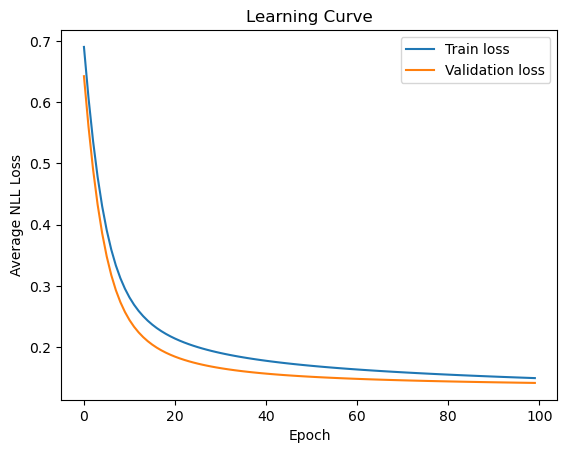

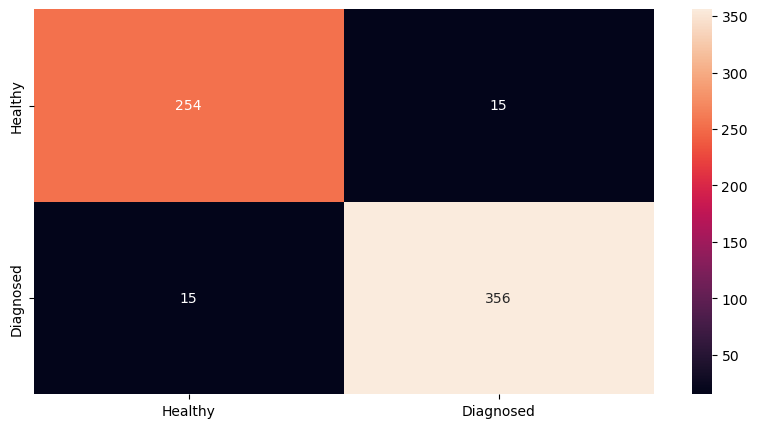

In [143]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_2() #Load the training, validation, and test datasets.
softreg = LogisticxRegression(epochs=100, batch_size=32, alpha=.01, seed=42) #nitialize an instance of LogisticxRegression().
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat = softreg.predict(X_trn)

acc = accuracy_score(np.argmax(y_trn, axis=1), y_hat)
print("Training accuracy:", acc)

plt.plot(softreg.trn_loss, label='Train loss')
plt.plot(softreg.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

y_trn_cfm = np.argmax(y_trn, axis=1)
cfm = plot_confusion_matrix(y_trn_cfm, y_hat, cardio2name)

Validation accuracy: 0.9375


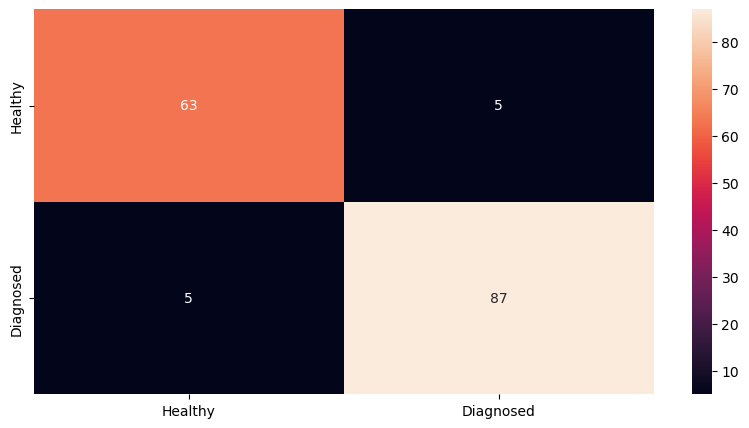

In [144]:
y_hat = softreg.predict(X_vld)
acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
print("Validation accuracy:", acc)

y_vld_cfm = np.argmax(y_vld, axis=1)
cfm = plot_confusion_matrix(y_vld_cfm, y_hat, cardio2name)

Testing accuracy: 0.97


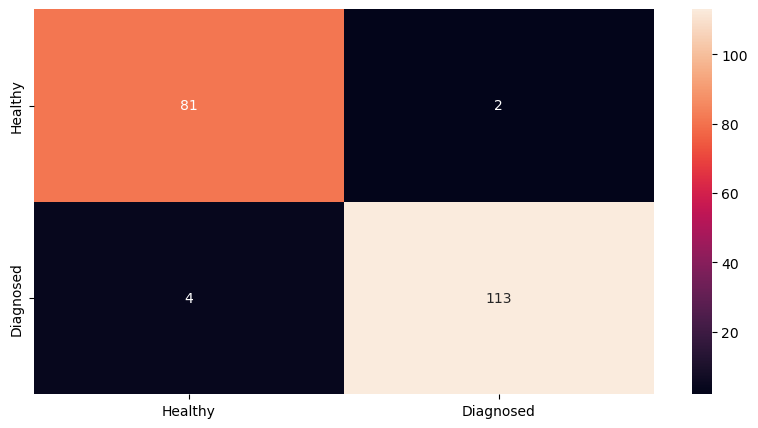

In [145]:
y_hat = softreg.predict(X_tst)
acc = accuracy_score(np.argmax(y_tst, axis=1), y_hat)
print("Testing accuracy:", acc)

y_tst_cfm = np.argmax(y_tst, axis=1)
cfm = plot_confusion_matrix(y_tst_cfm, y_hat, cardio2name)

Train MSE:  0.0680588405538947
Train RMSE:  0.26088089342436466
Validation MSE:  0.06899376063525196
Validation RMSE:  0.26266663403495305
Test MSE:  0.06679668579776919
Test RMSE:  0.258450548070166


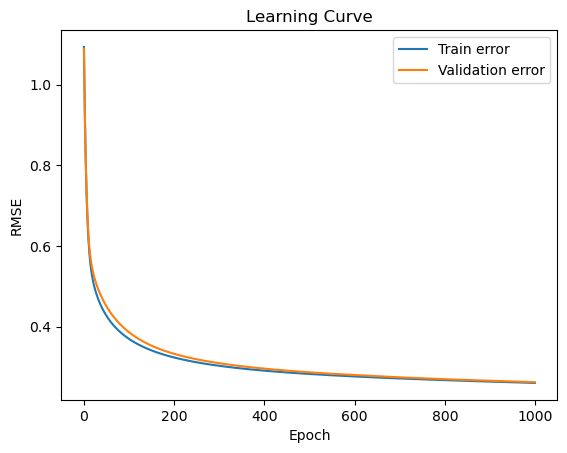

In [146]:
X, y = nonlinear_data()
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data_NN_2()
nn = NeuralNetwork(hidden_neurons=16,output_neurons=1,batch_size=32,alpha=0.001,epochs=1000,seed=0,)
nn.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)

#Training
y_hat_trn = nn.predict(X_trn)
trn_mse_score = mse(y_trn, y_hat_trn)
trn_rmse_score = rmse(y_trn, y_hat_trn)

#Validation
y_hat_vld = nn.predict(X_vld)
vld_mse_score = mse(y_vld, y_hat_vld)
vld_rmse_score = rmse(y_vld, y_hat_vld)

#Test
y_hat_tst = nn.predict(X_tst)
tst_mse_score = mse(y_tst, y_hat_tst)
tst_rmse_score = rmse(y_tst, y_hat_tst)

print("Train MSE: ", trn_mse_score)
print("Train RMSE: ", trn_rmse_score)
print("Validation MSE: ", vld_mse_score)
print("Validation RMSE: ", vld_rmse_score)
print("Test MSE: ", tst_mse_score)
print("Test RMSE: ", tst_rmse_score)

plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epoch")
plt.legend()
plt.show()

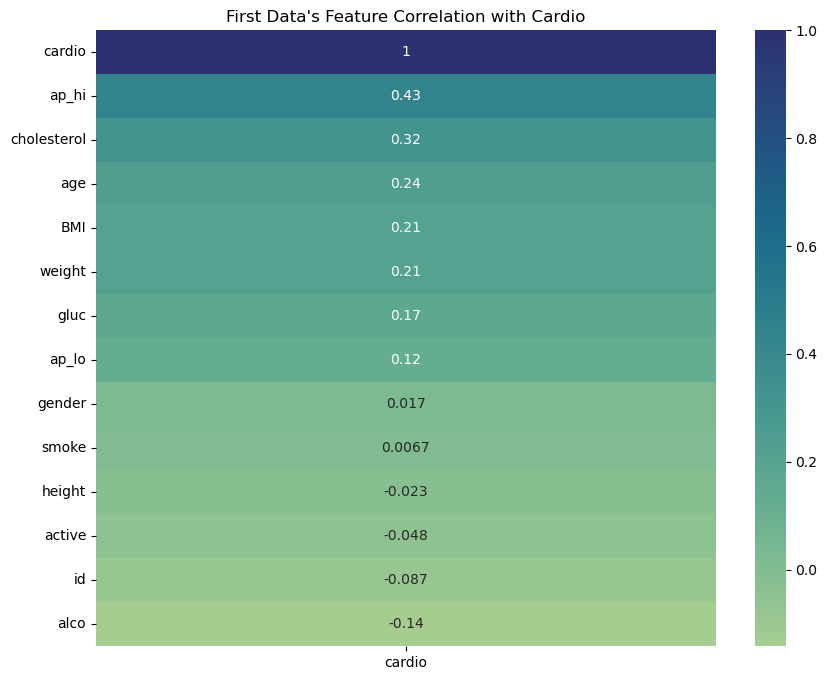

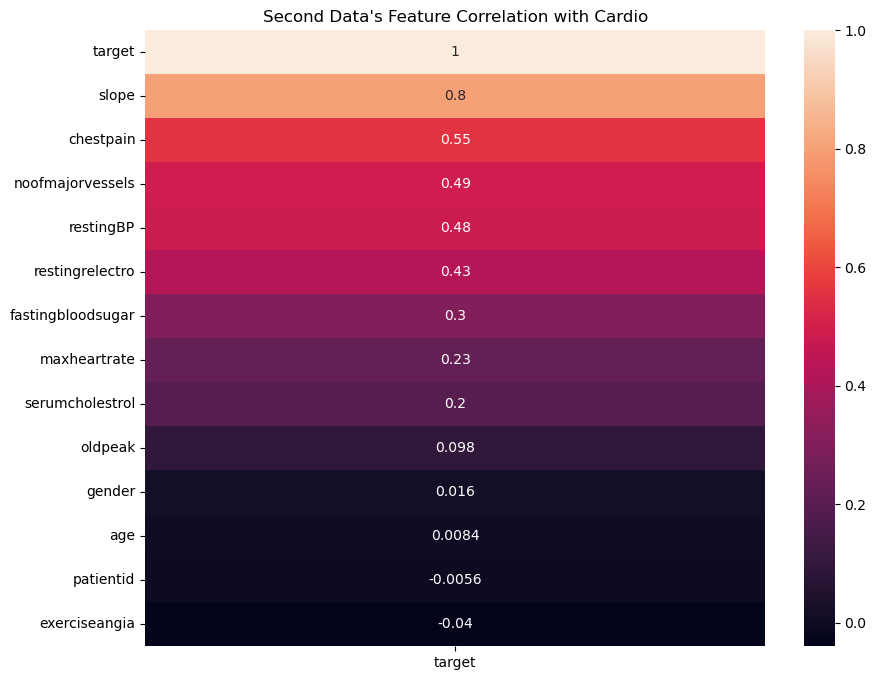

In [147]:
corr = cardiovascular_disease_df_cp.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['cardio']].sort_values(by='cardio', ascending=False), annot=True, cmap="crest")
plt.title("First Data's Feature Correlation with Cardio")
plt.show()

corr = cardiovascular_disease_2_df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap="rocket")
plt.title("Second Data's Feature Correlation with Cardio")
plt.show()

## Results

First, I ran logistic regression using the entire dataset. As a result, I obtained a training accuracy of 71.57%, validation accuracy of 72.19%, and testing accuracy of 72.07%. These results are not particularly high, but they were expected since some features had low correlation values.

Next, I trained the same model using the top 8 features with the highest correlation values. The results were a training accuracy of 71.97%, validation accuracy of 72.19%, and testing accuracy of 71.86%. This showed little to no improvement compared to using the full dataset.

Lastly, I trained the model using only the top 3 selected features. I achieved a training accuracy of 71.56%, validation accuracy of 71.97%, and testing accuracy of 72.11% ˙These results contradicted my hypothesis. According to Number Analytics, carefully selecting features can improve logistic regression accuracy, making the model more stable and easier to maintain. pred.

I then applied a similar approach using a neural network model. First, I trained the model on the entire dataset and got a training RMSE of 0.4506, validation RMSE of 0.4516, and testing RMSE of 0.4564. These results suggest that the model performs slightly better than random guessing (since the label is binary and the mean value is 0.5). Next, I trained the neural network using the top 8 selected features. This gave me a training RMSE of 0.4419, validation RMSE of 0.4407, and testing RMSE of 0.4444. Then, I used only the top 3 features for training. The results were a training RMSE of 0.4448, validation1 RMSE of 0.4405, and testing RMSE of 0.4459. This behavior was very similar to what I observed with logistic regression: selecting features with higher correlation did not significantly improve performance.

To compare models, I also tested a neural network built with TensorFlow. Using the entire dataset, I got a training, validation, and testing RMSE of 0.4404. Using the top 8 selected features, I got a training, validation, and testing RMSE of 0.4408. Interestingly, the TensorFlow model returned identical RMSEs for all sets, and the values were very similar to those from my custom neural network model. Therefore, there was no significant difference in accuracy between the TensorFlow model and my implementation in this prediction project.

Now, instead of selecting features based on correlation values, I referred to the Centers for Disease Control and Prevention (CDC). According to the CDC (https://www.cdc.gov/heart-disease/risk-factors/index.html), heart disease risk factors include high blood pressure, high cholesterol, and smoking. I preprocessed the data to select only aphi, aplo, cholesterol and smoking status as features to predict cardiovascular disease. As a result, I obtained a training accuracy of 71.18%, validation accuracy of 72.12%, and testing accuracy of 71.39%. These results are very similar to the previous ones and do not indicate strong predictive performance.

Since I was not able to get satisfactry result with any feature selection, I will change number of hiddel layers. According to Medium article, the number of neurons in the hidden layer should typically fall between the size of the input and output layers. Therefore, in this case, reducing the number of hidden layers may lead to an increase in model accuracy.

As you can see, when the number of layers decreases, the graph becomes more downward-sloping and smoother. However, the accuracy still remains around 47% to 52 %. Based on these results, we cannot expect significant improvement by optimizing the number of hidden layers.

Now, I changed the number of epochs. Since my dataset has various features and a relatively high complexity in the relationship between each feature and the target value, I wanted to observe the effect of increasing the number of epochs. Additionally, since I previously experimented to determine the best number of hidden layers, I also wanted to see how changing the number of output layers would affect the results.

As a result, increasing the number of epochs to 1000 caused the model to become less accurate. From the middle graph, the optimal number of epochs for this model appears to be around 160. However, even at that point, the RMSE value remains above 0.470, which is not ideal. Increasing the number of output layers helped smooth the curve, but the general trend and values remained very similar to those in the middle graph. Therefore, I cannot expect significant improvement from changing the number of epochs or output layers.

As I mention in Data section, I want to compare results from the primary dataset with another dataset that includes symptoms of heart disease as features.

This visualization shows the correlation between cardiovascular disease and each feature in the secondary dataset. From this, we can observe that the features in the secondary dataset have relatively higher correlations with the target value compared to the primary dataset.
In the primary dataset, only 5 features had a correlation value higher than 0.2, and none had a correlation above 0.5. However, in the secondary dataset, 2 features (‘slope’ and ‘chestpain’) have correlation values over 0.5, and 8 features have correlation values higher than 0.2, which is a significant improvement compared to the first dataset.
First, I ran logistic regression using the entire dataset. As a result, I obtained a training accuracy of 95.31%, validation accuracy of 93.75%, and testing accuracy of 97%. These results are excellent and show a significant improvement over the previous training results.

I also trained a neural network model using the secondary dataset. As a result, I achieved a training RMSE of 0.2609, validation RMSE of 0.2627, and testing RMSE of 0.2585, which also indicate excellent performance and a significant improvement over the previous neural network results.

Even though predictions using the secondary dataset showed higher accuracy (above 90 As I hypothesized, the lower prediction accuracy of the primary dataset is likely due to the generally weaker correlation values between its features and the target variable. In contrast, the secondary dataset includes some symptom-based features, which tend to have stronger correlations with the target.

As noted in this AHA journal article, predicting cardiovascular disease remains a complex task, even when various health measures are available and some are known to influence heart disease risk. Therefore, we cannot determine which dataset is better. However, combining the features from both datasets may provide a more accurate prediction model for cardiovascular disease.


## Conclusion

Cardiovascular disease prediction remains a significant challenge due to the complex relationships between various health indicators and the diagnosis of the disease. As we observed, symptom-based features tend to have higher correlation values than general health measurements. However, relying solely on symptom-based features may contradict the goal of early prediction, which aims to prevent cardiovascular disease before symptoms appear.

However, incorporating both symptom-based features and general health measurements can improve the effectiveness of the diagnostic process. Furthermore, extending this prediction task to a multi-class classification model using logistic regression or a neural network with a softmax function could allow us to assess the severity of cardiovascular disease and the necessity for surgery. This advancement would benefit the healthcare industry and help a wide range of individuals by providing more accurate predictions.

As I explained in the Method section, the use of logistic regression and neural networks was appropriate for this binary classification task. The sigmoid activation function for logistic regression and the tanh activation function for neural networks generally performed well for this project's purpose. Additionally, this project allowed me to gain hands-on experience with two of the algorithms I’m most interested in, and TensorFlow which made it a valuable learning experience.

Most of the models and code I used were from class assignments, so the implementation itself was not the most challenging part. The real challenge was identifying the cause of the lower accuracy when using the primary dataset. To address this issue, I applied various approaches, as described in the Results section. Another difficulty was the long runtime of the model training process, which made hyperparameter tuning more time-consuming and difficult.

As mentioned earlier, I am considering extending this project to a multi-class classification model that can assess the severity level of each individual’s cardiovascular condition. This would be based on a combination of symptom-based features and general health metrics. Since the logistic regression and neural network models I used are adaptable, they can be extended with a new dataset that includes labels indicating the severity of cardiovascular disease. I believe this model is highly scalable. Many of the health metrics used in this project are common to other diseases as well, so with appropriate datasets, this model could be repurposed to predict other health conditions too.

## Acknowledgement

I, Kento Hopkins, acknowledge the use of AI in completing this assignment and would like to provide a brief explanation of how I utilized AI, specifically ChatGPT, as a tool to support my
work. For this assignment, I used ChatGPT to help me fix my grammar mistakes, understand instructions properly and debug my code while properly constructing my training loop and assure that my plots ran smoothly and matched up with the assignment instructions.


In general, including in this report, I use ChatGPT to correct my grammar. At the beginning of the chat, I told ChatGPT, “I will ask you to fix my grammar multiple times. Just fix grammar issues.”

I used the prompt: “Fix these grammar mistakes: [sentences I wrote].” The following is an example.

In the Data section, specifically when I was working on data visualization, I wanted to try a new visualization method that shows the disparities of each feature in relation to the target value to determine which features affect the diagnosis of cardiovascular disease. I also wanted to calculate the correlation values between each feature and the target. However, I was unsure about what options were available and didn’t know exactly where or how to start searching. Out of curiosity, I asked ChatGPT, and I received several helpful and satisfying suggestions.

* Prompt: "I have data of Cardiovascular Disease and I want to visualize data to see how much each feature matters effectively. I am currently using matplotlib and seaborn. Tell me what is effective and useful visualization?"
* Output: ChatGPT provided useful visualization options, including correlation heatmaps, boxplots or violin plots, countplots/bar charts, feature importance via machine learning, pair plots or scatter matrix, and KDE plots/histograms.
* Takeaway: I was able to learn what options are available for data visualization using Matplotlib and Seaborn. I used correlation heatmaps, boxplots, bar charts, and KDE plots in this project.

In this project, I used TensorFlow. However, since I was not very familiar with it, I encountered errors and wasn’t entirely sure what they meant. Therefore, I asked ChatGPT to explain the error messages so I could understand the issues.

* Prompt: "I am using tensorFlow and I get following warning. Could you explain what these message exactly mean. /opt/anaconda3/envs/itcs-3156-2/lib/python3.12/site-packages/keras/src/ops/nn.py:908: UserWarning: You are using a softmax over axis -1 of a tensor of shape (64, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead? warnings.warn( /opt/anaconda3/envs/itcs-3156 2/lib/python3.12/site-packages/keras/src/losses/ losses.py:33: SyntaxWarning: In loss categorical\_crossentropy, expected y\_pred.shape to be (batch\_size, num\_classes) with num\_classes > 1. Received: y\_pred.shape=(64, 1). Consider using 'binary\_crossentropy' if you only have 2 classes. return self.fn(y\_true, y\_pred, **self.\_fn\_kwargs)"
  
* Output: ChatGPT provided explanations for each warning and recommended that I use Dense(1, activation='sigmoid').
* Takeaway: I was able to learn what Dense(1, activation='sigmoid') is and how to utilize it, which was a great option since my project was a binary classification task, and I used the sigmoid activation function in my logistic regression model.

Based on the results above, I used model.add(Dense(1, activation='sigmoid')). Although I had read the documentation and believed I understood it well, I encountered an error during implementation and struggled to resolve it. Since I originally learned about using model.add(Dense(1, activation='sigmoid')) from ChatGPT, I reached out to ChatGPT for assistance.

* Prompt: "I used model.add (Dense(1, activation='sigmoid')) however I got error message that says. AttributeError: 'NeuralNetwork' object has no attribute 'add'. What I did potentially wrong?"
* Output: ChatGPT provided an explanation of what I did wrong and recommended using Sequential() to resolve the error.
* Takeaway: I was able to learn what Sequential() is and applied the solution provided by ChatGPT from the above prompts.

For this project, I referred to the provided notebooks: “note-perceptron”, “note-logistic-regression”, “note-neural-networks”, and “note-multilayer-neural-networks”. I used these resources in the Methods section to deepen my understanding and improve my explanations. Some of the math equations are from these notes. Additionally, I integrated code from “note-multilayer-neural-networks” to implement the model using TensorFlow. I also drew upon my previous coursework and homework assignments to enhance my coding skills and reinforce my understanding of the algorithms used in this project.

## References

- Szabo, Bibor. “[How to Create a Seaborn Correlation Heatmap in Python?](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)” *Medium*, 14 Dec. 2021.
- [Seaborn.Boxplot — Seaborn 0.13.2 Documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [Choosing Color Palettes — Seaborn 0.13.2 Documentation](https://seaborn.pydata.org/tutorial/color_palettes.html)
- Al-Alshaikh, Halah A., et al. “Comprehensive Evaluation and Performance Analysis of Machine Learning in Heart Disease Prediction.” *Scientific Reports*, vol. 14, no. 1, Apr. 2024. [https://doi.org/10.1038/s41598-024-58489-7](https://doi.org/10.1038/s41598-024-58489-7)
- Harvard Health. “[A Closer Look at Heart Disease Risk](https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk).” *Harvard Health*, 21 Sept. 2021.
- National Library of Medicine. “[High Blood Pressure](https://medlineplus.gov/highbloodpressure.html).” *Hypertension | MedlinePlus*
- “[Understanding Blood Pressure Readings](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings).” *heart.org*, 4 Mar. 2025.
- GeeksforGeeks. “[Applying PCA to Logistic Regression to Remove Multicollinearity](https://www.geeksforgeeks.org/applying-pca-to-logistic-regression-to-remove-multicollinearity).” 5 June 2024.
- “[Everything You Need to Know About Logistic Regression](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression).” *Spiceworks Inc*, 10 Mar. 2025.
- GeeksforGeeks. “[Logistic Regression in Machine Learning](https://www.geeksforgeeks.org/understanding-logistic-regression).” 3 Feb. 2025.
- GeeksforGeeks. “[What Is a Neural Network?](https://www.geeksforgeeks.org/neural-networks-a-beginners-guide).” 3 Apr. 2025.
- Krishnan, Sandhya. “[How to Determine the Number of Layers and Neurons in the Hidden Layer?](https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3)” *Medium*, 6 Aug. 2022.
- Lee, Sarah. “[5 Key Factors Boosting Logistic Regression Accuracy by 20%](https://www.numberanalytics.com/blog/logistic-regression-accuracy-5-factors).”
- [Cardiovascular_Disease_Dataset (9 Dec. 2023)](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset)
- [Cardiovascular Disease Dataset (20 Jan. 2019)](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)
- Moran, Andrew E., and Lee Goldman. “Predicting the Future Prevalence of Cardiovascular Disease: The Good, the Bad, the Known, and the Unknown.” *Circulation*, vol. 150, no. 4, June 2024, pp. 253–54. [https://doi.org/10.1161/circulationaha.124.070265](https://doi.org/10.1161/circulationaha.124.070265)
- IBM. “[What Is Principal Component Analysis?](https://www.ibm.com/think/topics/principal-component-analysis)”
- IBM. “[Logistic Regression](https://www.ibm.com/think/topics/logistic-regression)”
- IBM. “[Neural Networks](https://www.ibm.com/think/topics/neural-networks)”
- GeeksforGeeks. “[Advantages and Disadvantages of Logistic Regression](https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression).” 2 Jan. 2025.
- GeeksforGeeks. “[Logistic Regression in Machine Learning](https://www.geeksforgeeks.org/understanding-logistic-regression).” 3 Feb. 2025.
- Kleimann, Sebastián Gerard Aguilar. “[Logistic Regression for Binary Classification](https://towardsdatascience.com/logistic-regression-for-binary-classification-56a2402e62e6).” *Towards Data Science*, 5 Mar. 2025.
- “[Causes and Risk Factors | NHLBI, NIH](https://www.nhlbi.nih.gov/health/heart-attack/causes).” 24 Mar. 2022.
- “[Logistic Regression for Binary Classification With Core APIs](https://www.tensorflow.org/guide/core/logistic_regression_core).” *TensorFlow*
- “[tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).” *TensorFlow*
- “[Heart Disease Risk Factors](https://www.cdc.gov/heart-disease/risk-factors/index.html).” *CDC*, 2 Dec. 2024.
- GeeksforGeeks. “[What Is Perceptron | the Simplest Artificial Neural Network](https://www.geeksforgeeks.org/what-is-perceptron-the-simplest-artificial-neural-network).” 21 Oct. 2024.
- OpenAI. ChatGPT. OpenAI, 7 May 2025, https://chat.openai.com/chat.